In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py


In [2]:
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [3]:
def data_to_amp_and_phase_single_axis(data,fsamp,res):
    data_det=signal.detrend(data)
    freqs=np.linspace(0,int(fsamp/2),(int(res/2))+1)    # change
    FFT=np.fft.rfft(data_det)
    norm = np.sqrt(2 / (res* fsamp))
    PSD = norm**2 * (FFT * FFT.conj()).real
    Phase =np.angle(FFT)
    return freqs,PSD,Phase

## verification of the methods comparability to previously used mlab.psd

# fsamp=5000
# res=50000
# data=f[0].x2
# a = data_to_amp_and_phase_single_axis(data,fsamp,res)
# b = matplotlib.mlab.psd(signal.detrend(data), Fs = fsamp, NFFT = res, window = mlab.window_none)
# plt.loglog(a[0],a[1])
# plt.loglog(b[1],b[0],alpha=0.5)

(0.0, 11.0)

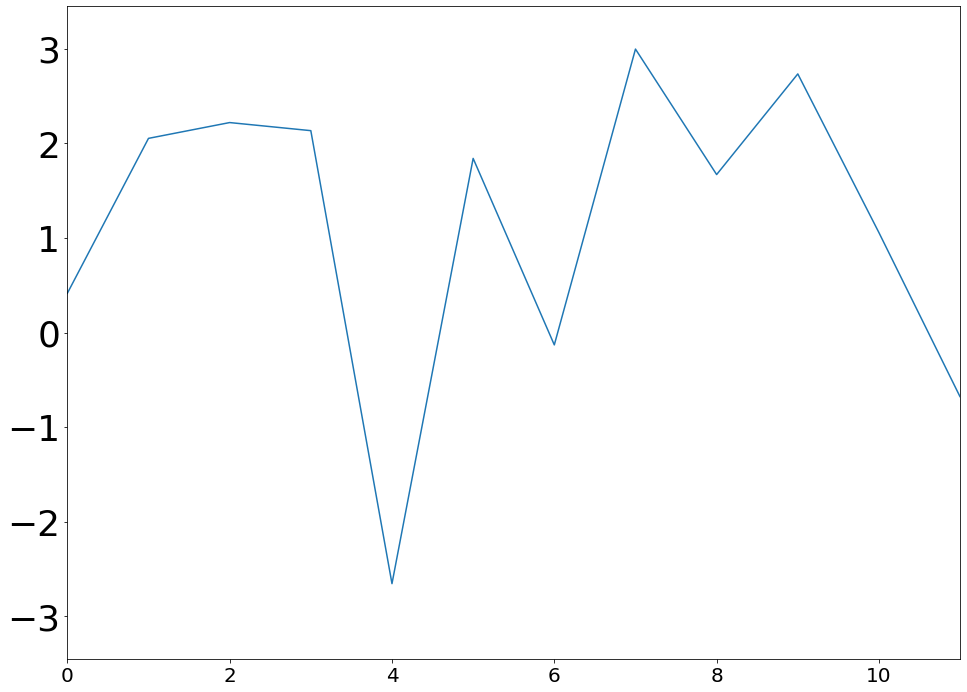

In [54]:
plt.plot(ph[130::130])
plt.xlim(0,11)

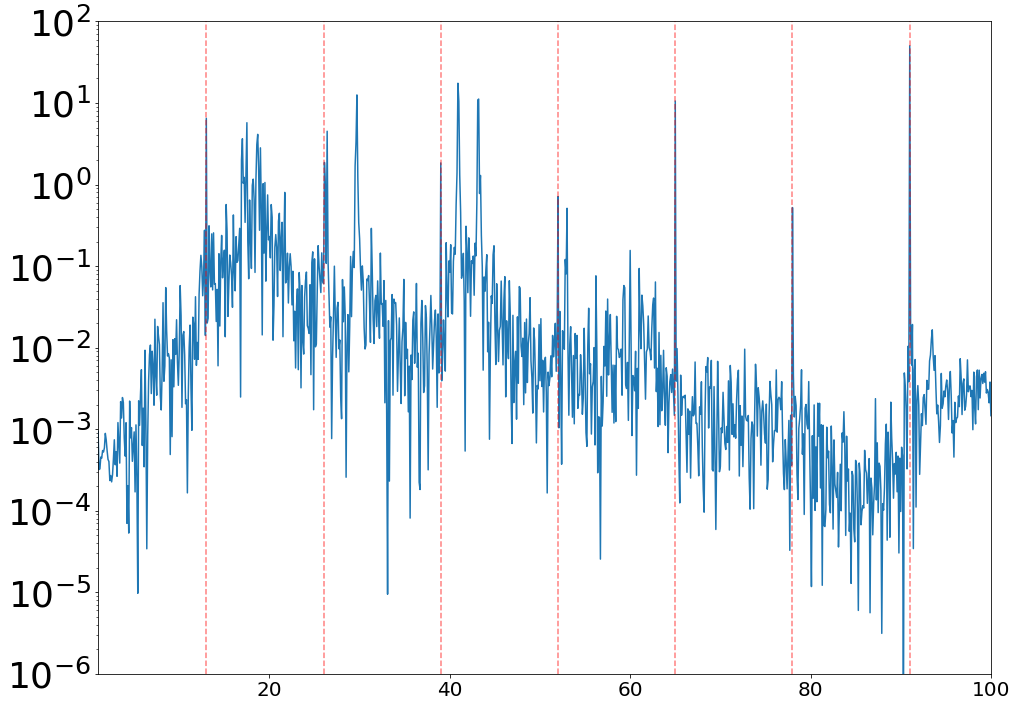

In [52]:
plt.plot(f,p)
plt.yscale("log")
plt.ylim(1e-6,100)
plt.xlim(1,100)
for i in np.arange(13,143,13):
    plt.axvline(i, ls="dashed", color="red",alpha=0.5)
    

In [25]:
fsamp=5000v
fdrive=13
corrs = [correlation(drive=file.cant_pos[1], response=file.x2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1)[0] for file in files]
fsamp=5000
fdrive=13
driveSig=files[0].cant_pos[1]
corrs2 = [correlation(drive=driveSig, response=file.x2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1)[0] for file in files2]


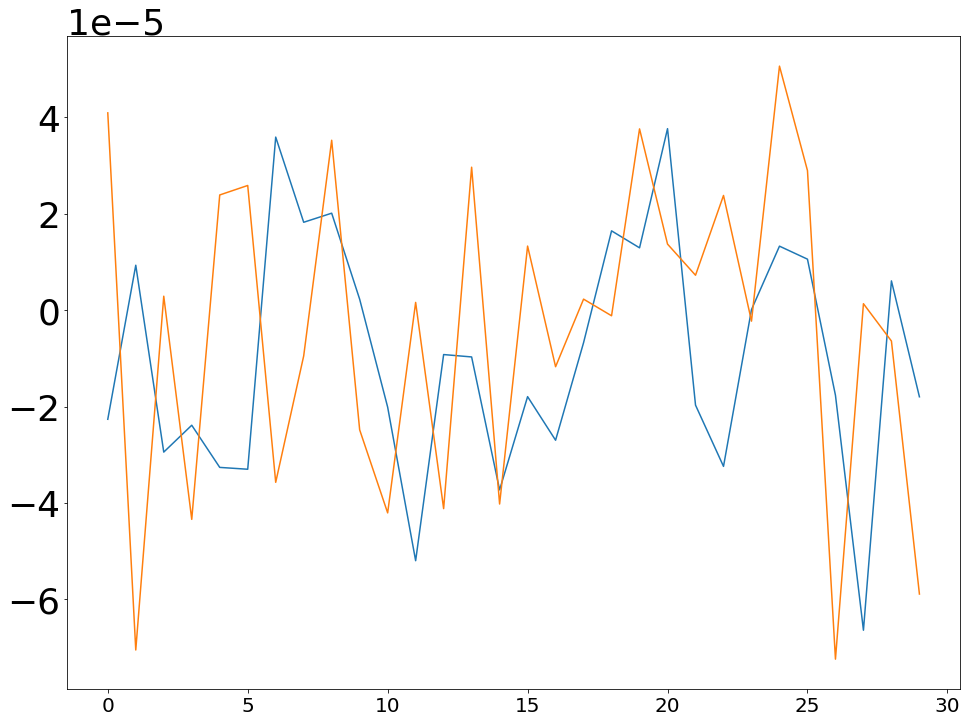

In [27]:
plt.plot(corrs)
plt.plot(corrs2)

In [5]:
l = load_dir("/data/new_trap/20220628/Shaking/1/","Shaking")


100%|██████████| 100/100 [00:03<00:00, 30.48it/s]

100  files in folder
100  files loaded


In [17]:
l2 = load_dir("/data/new_trap/20220615/Accelerometer/LongTermWithTable/","accel",max_file=50)


100%|██████████| 50/50 [00:01<00:00, 38.56it/s]

3500  files in folder
50  files loaded


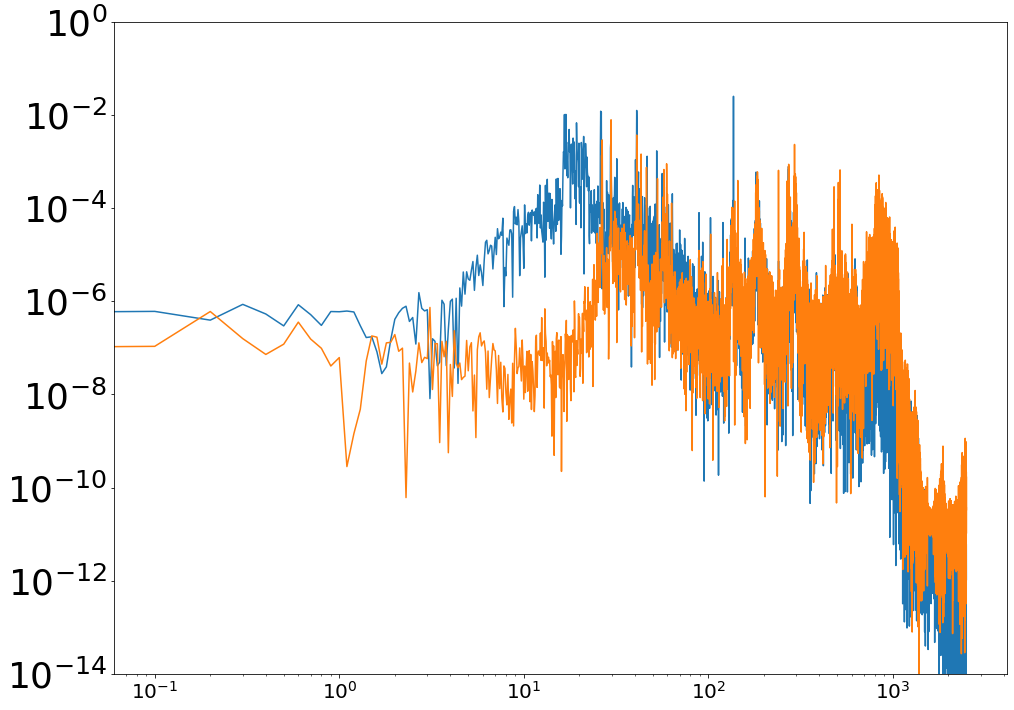

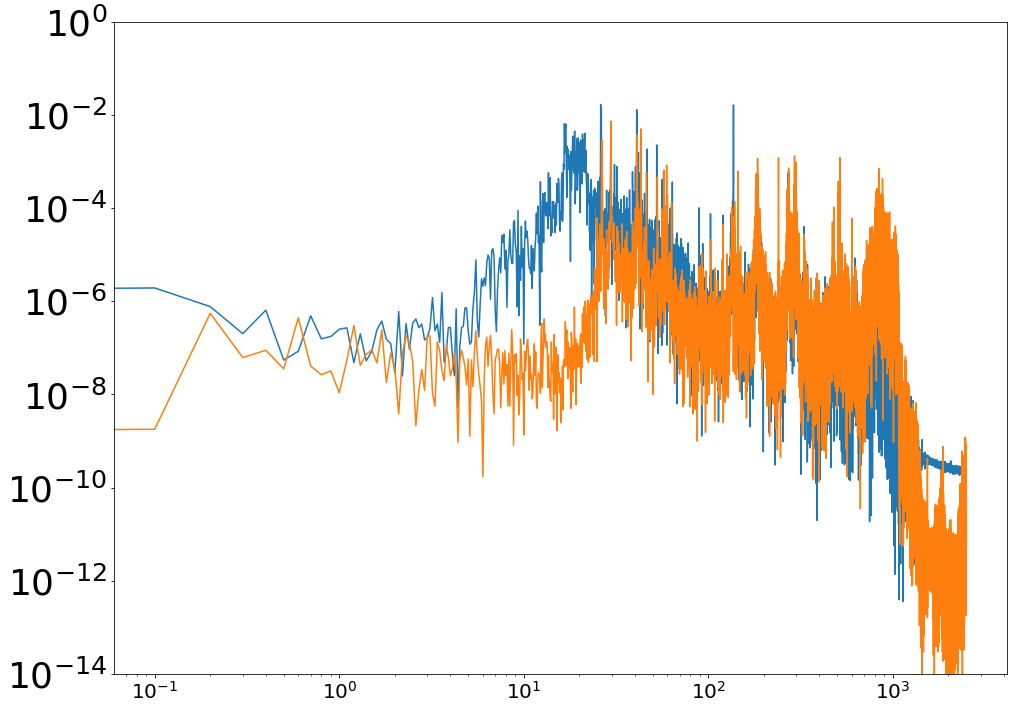

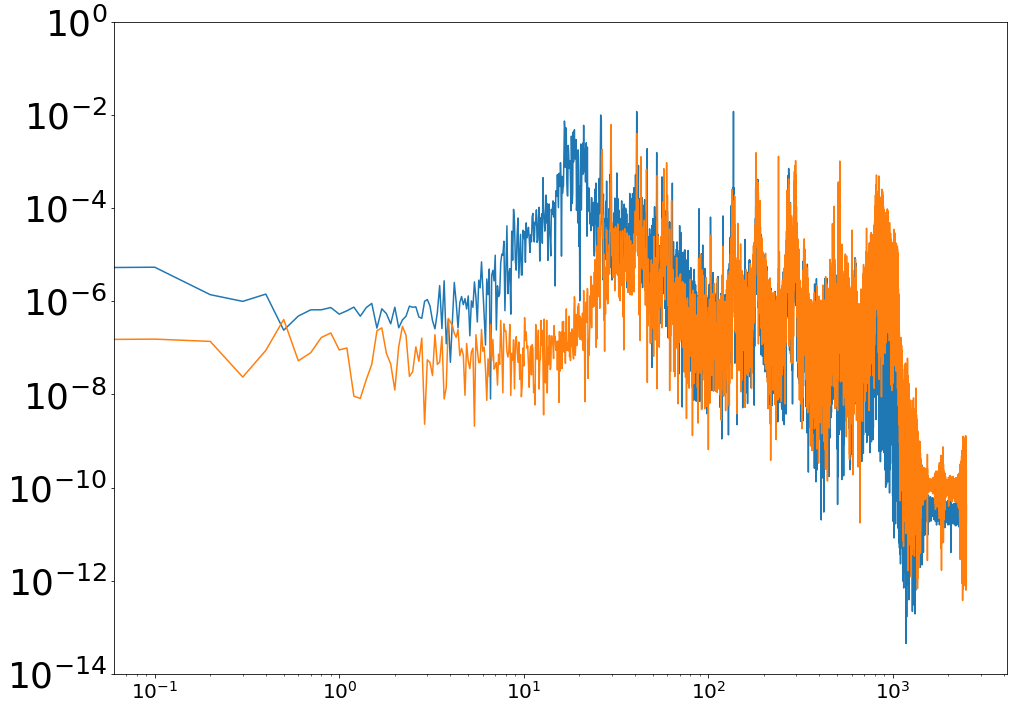

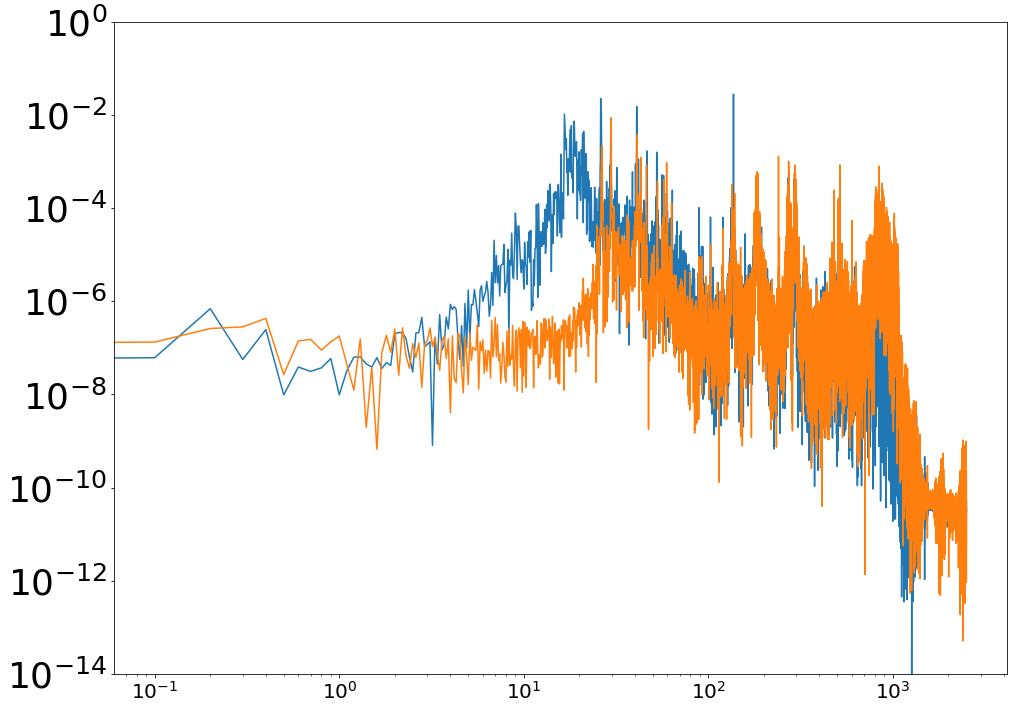

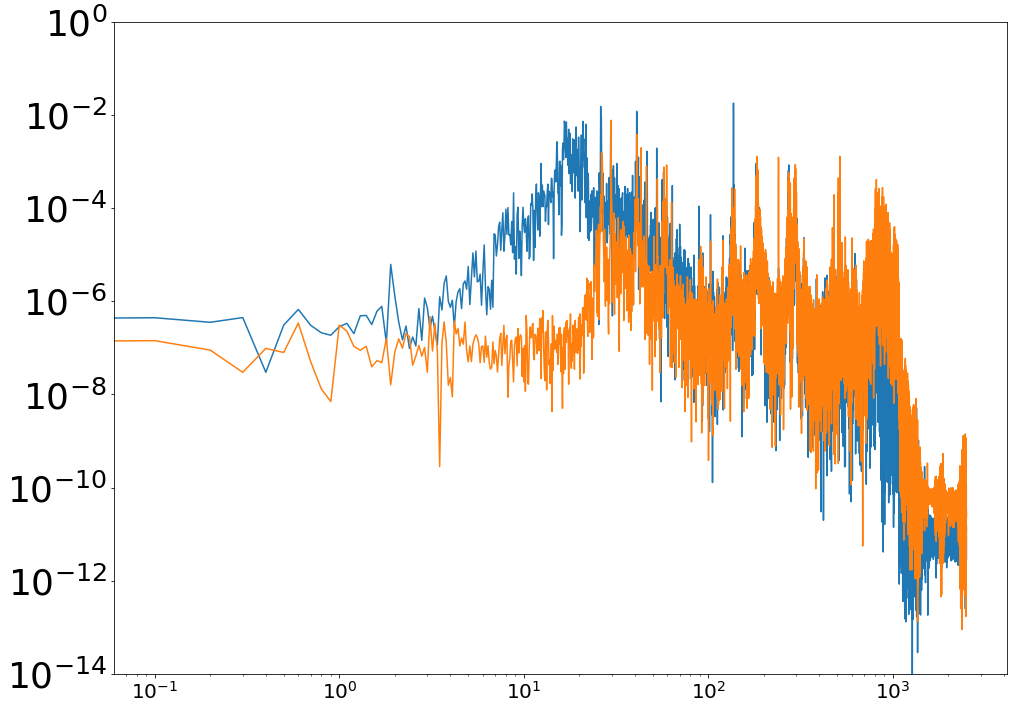

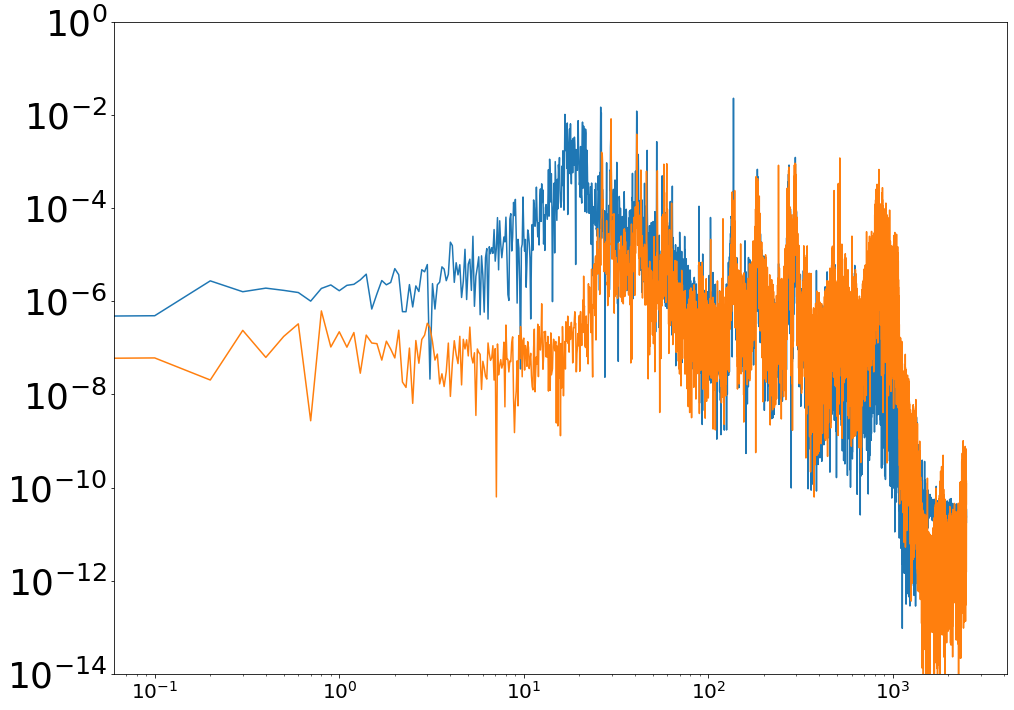

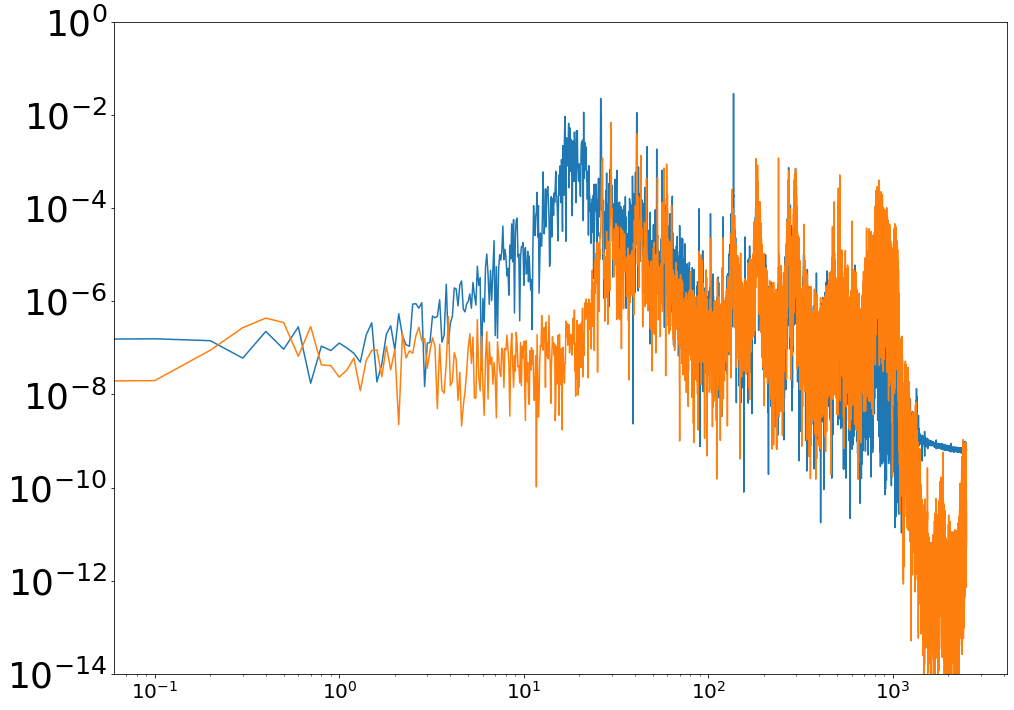

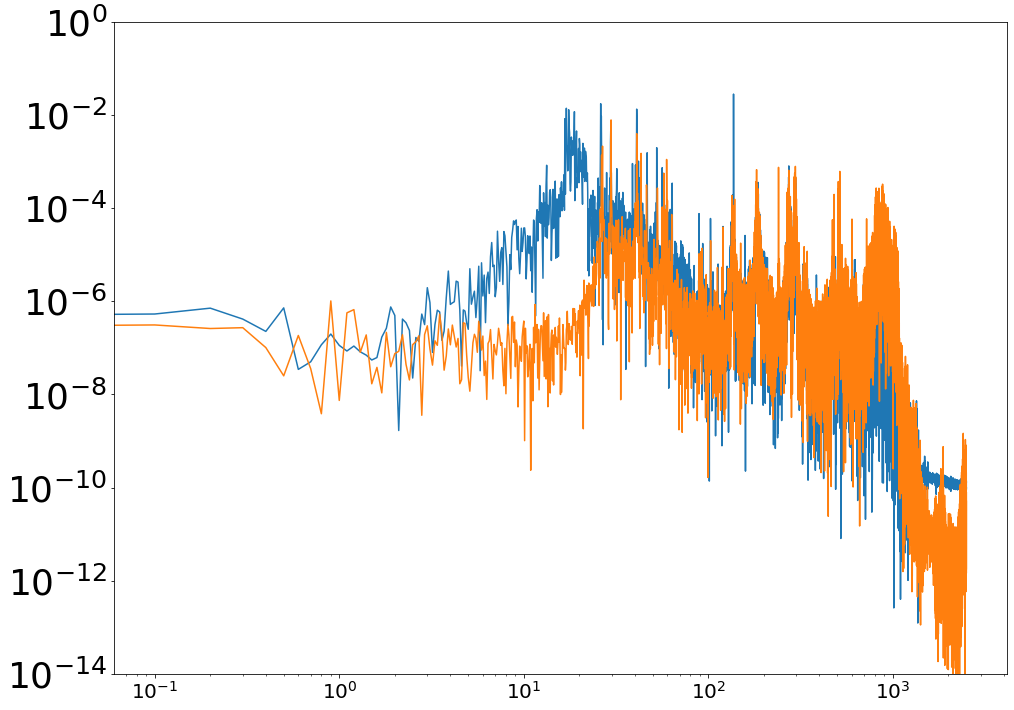

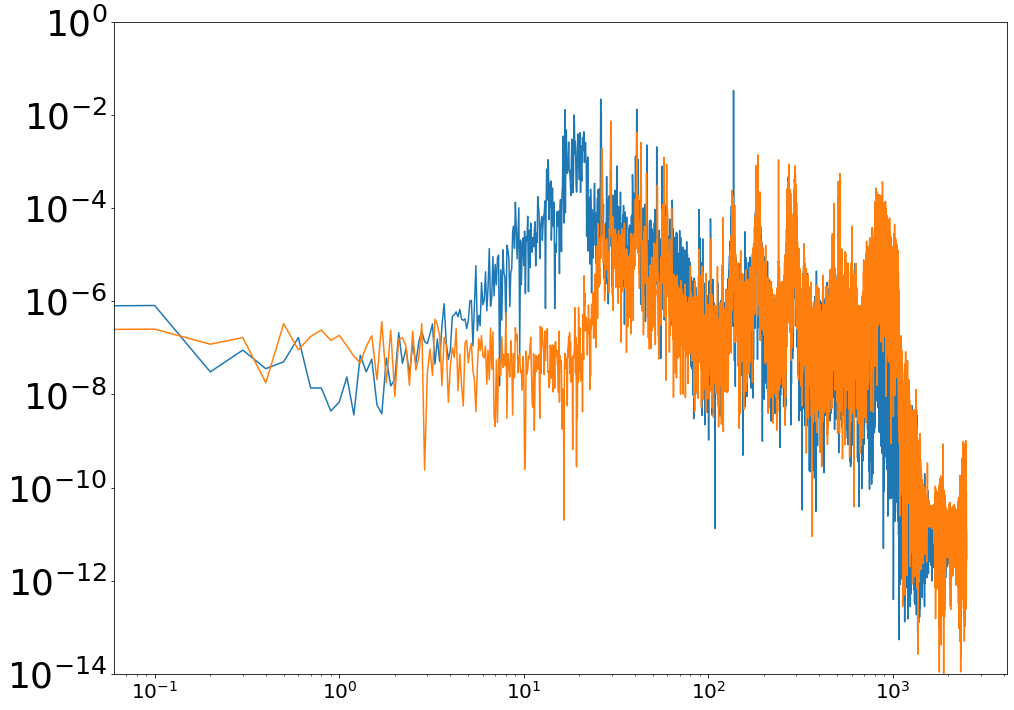

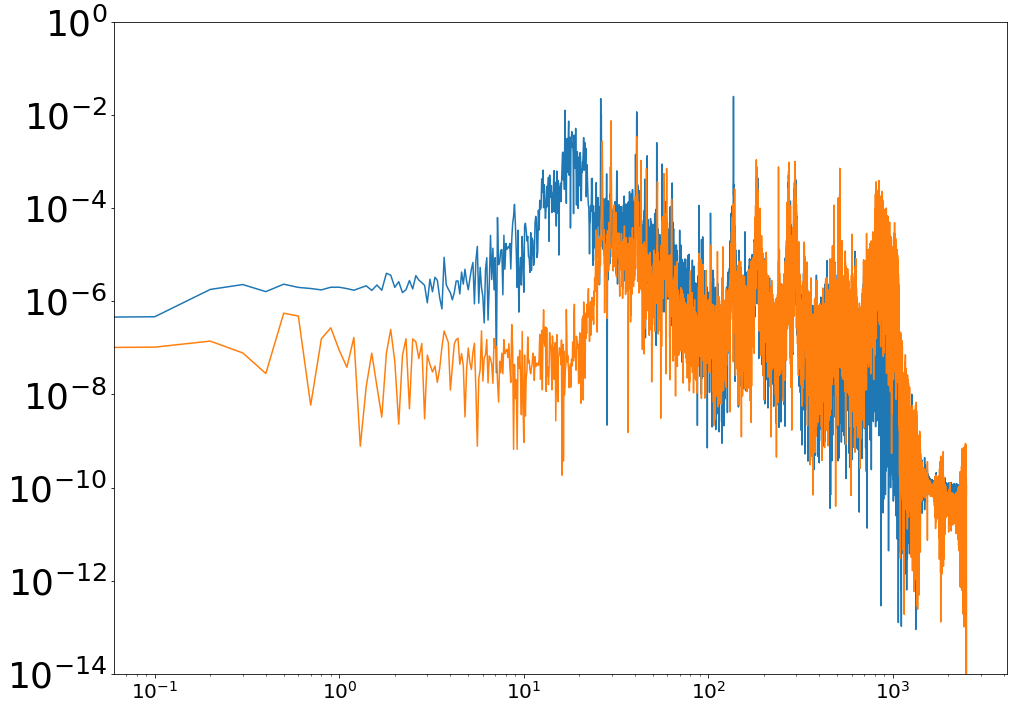

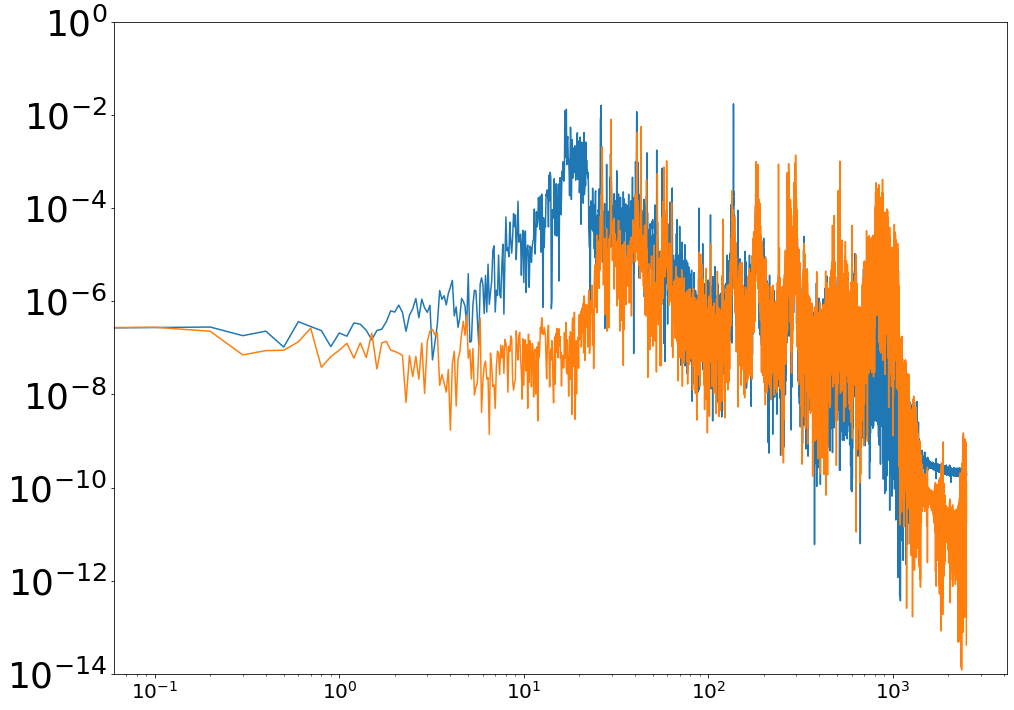

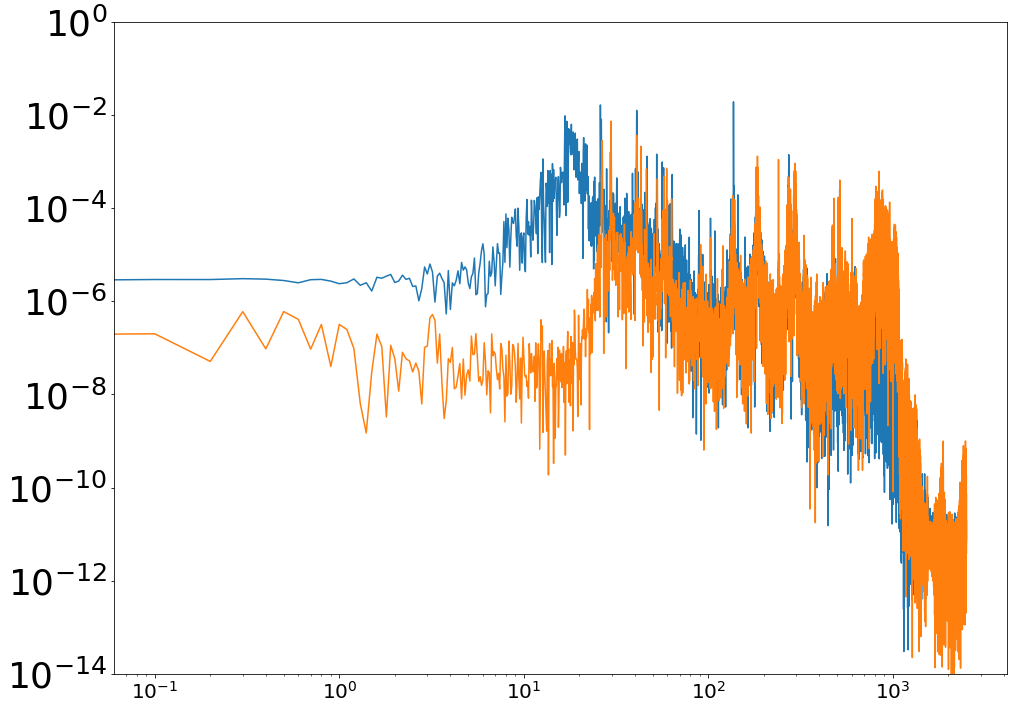

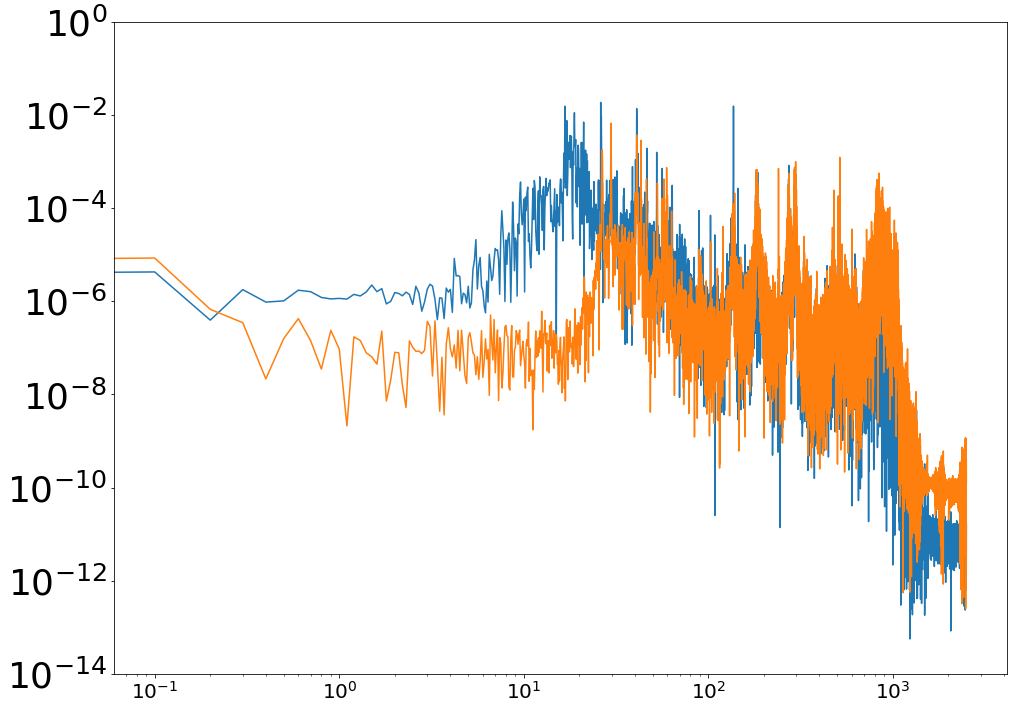

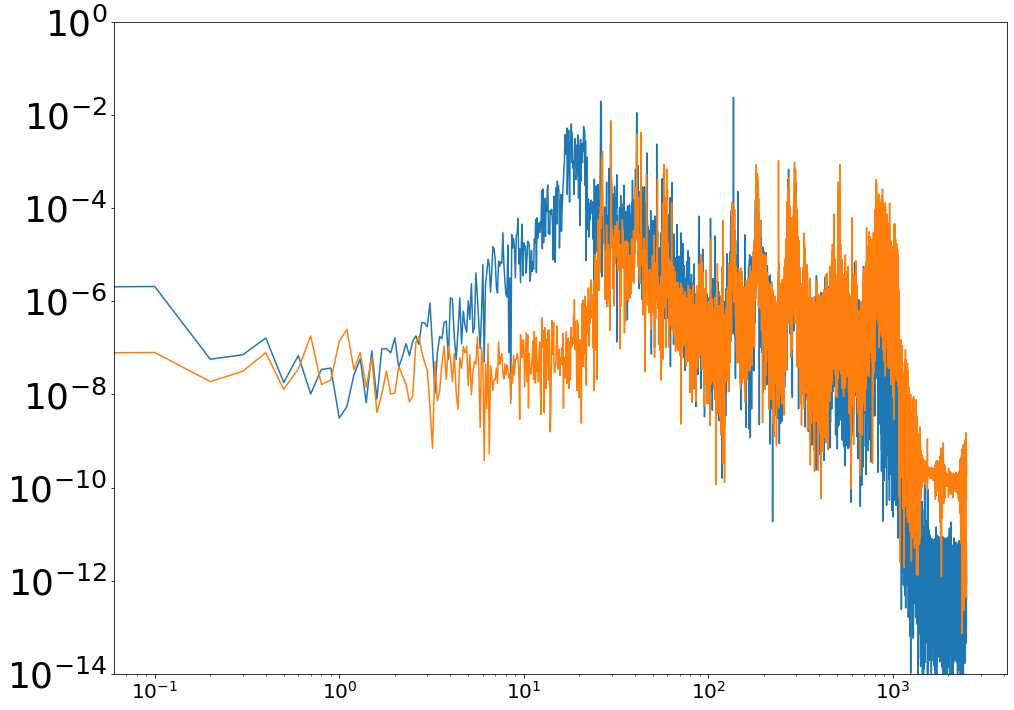

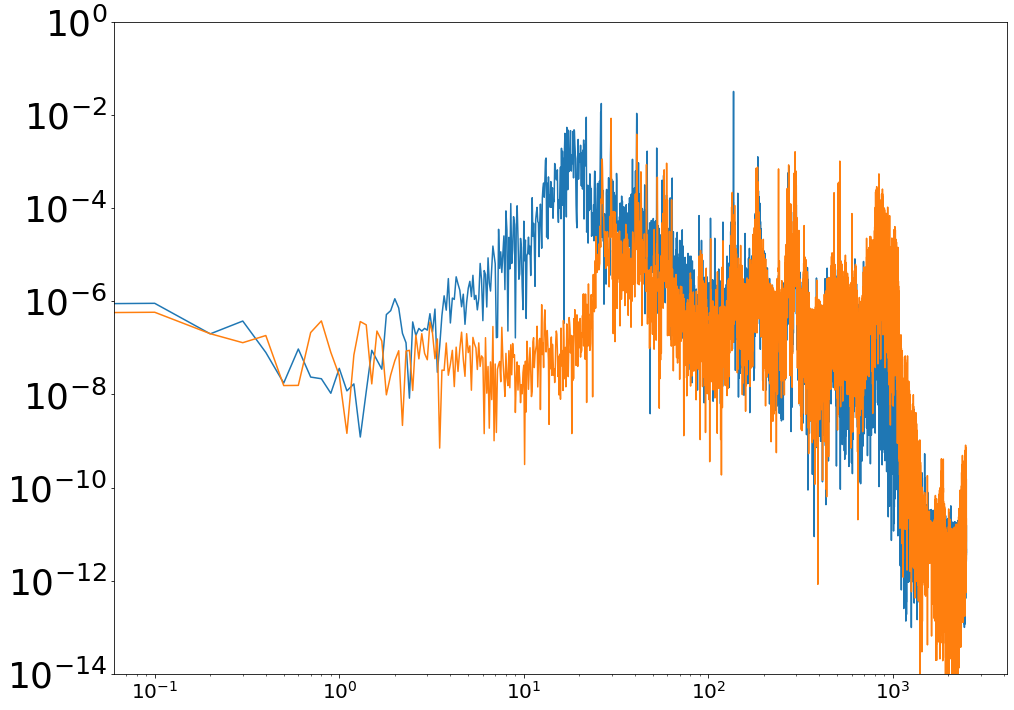

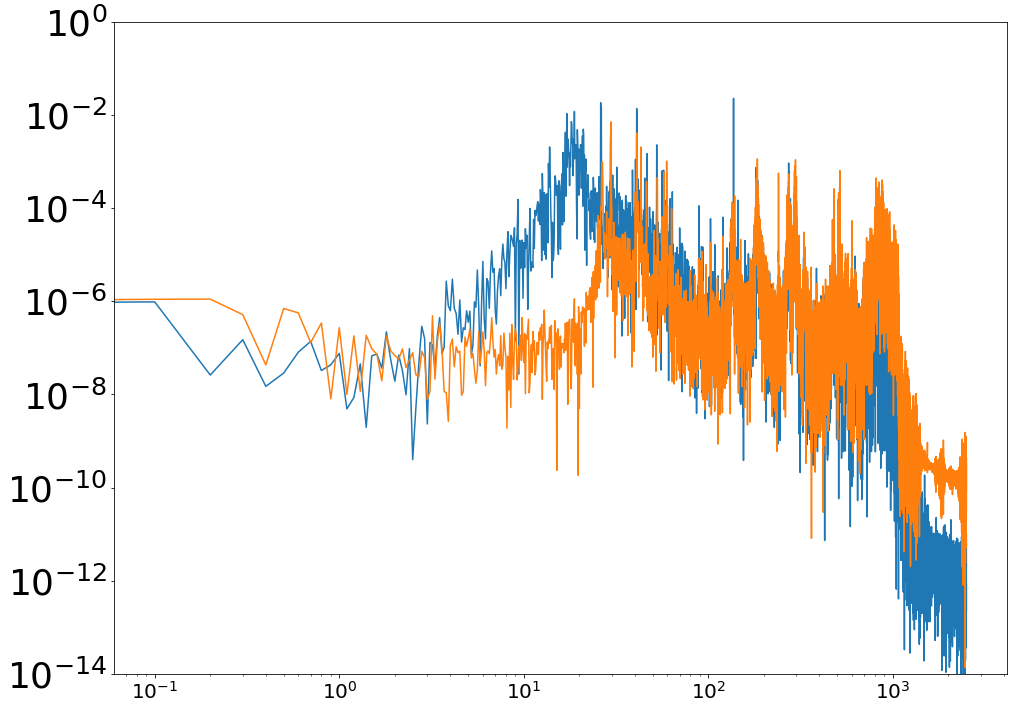

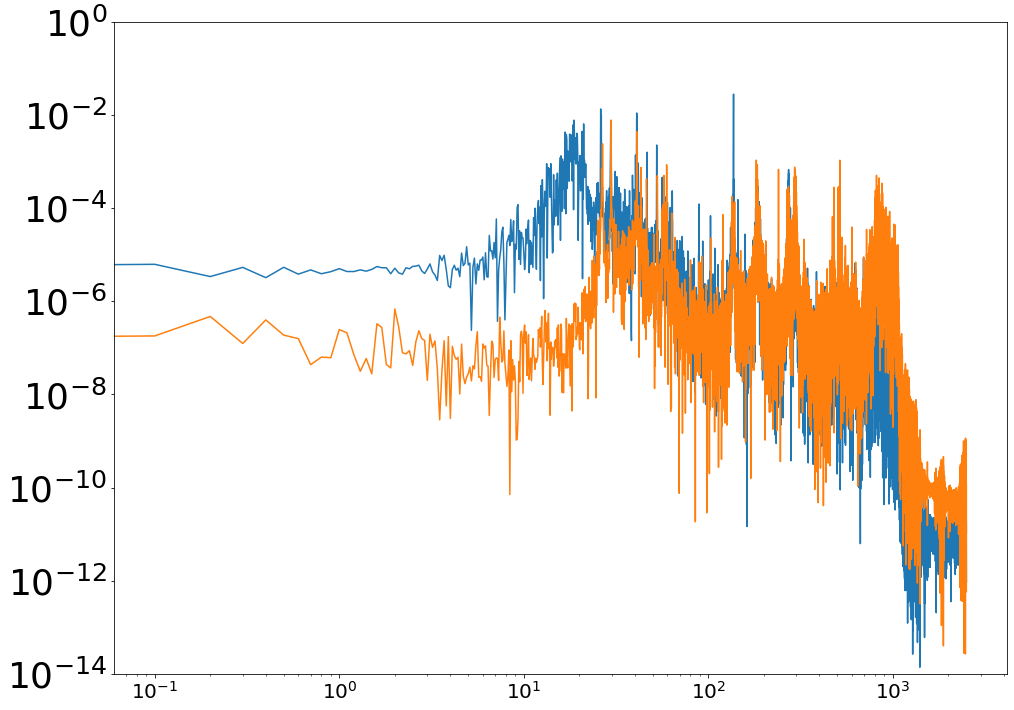

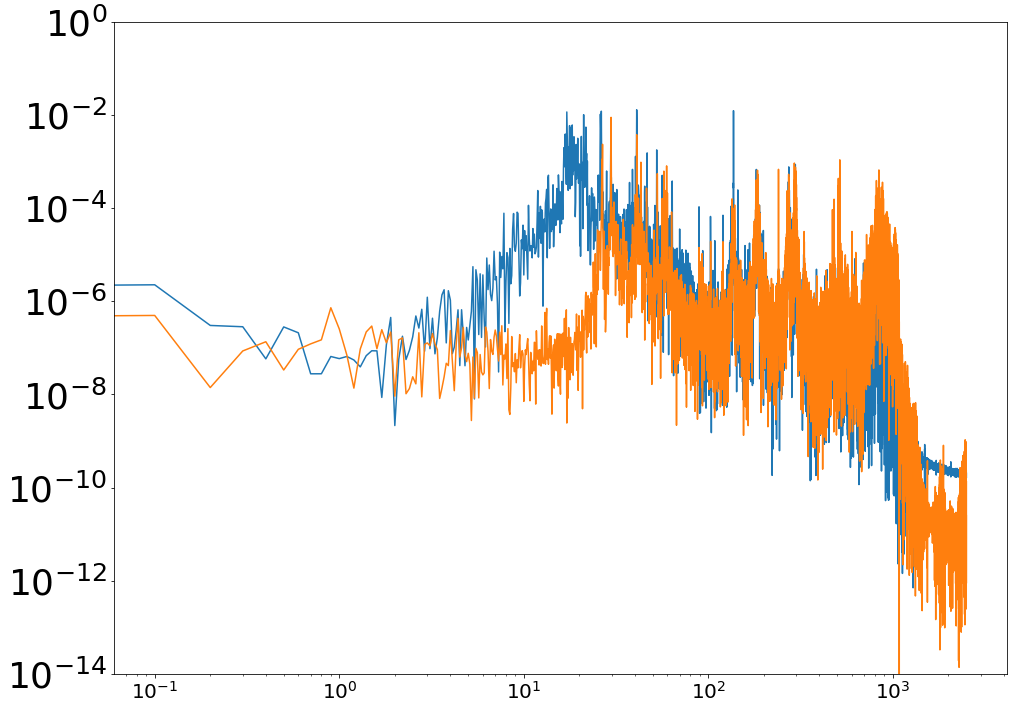

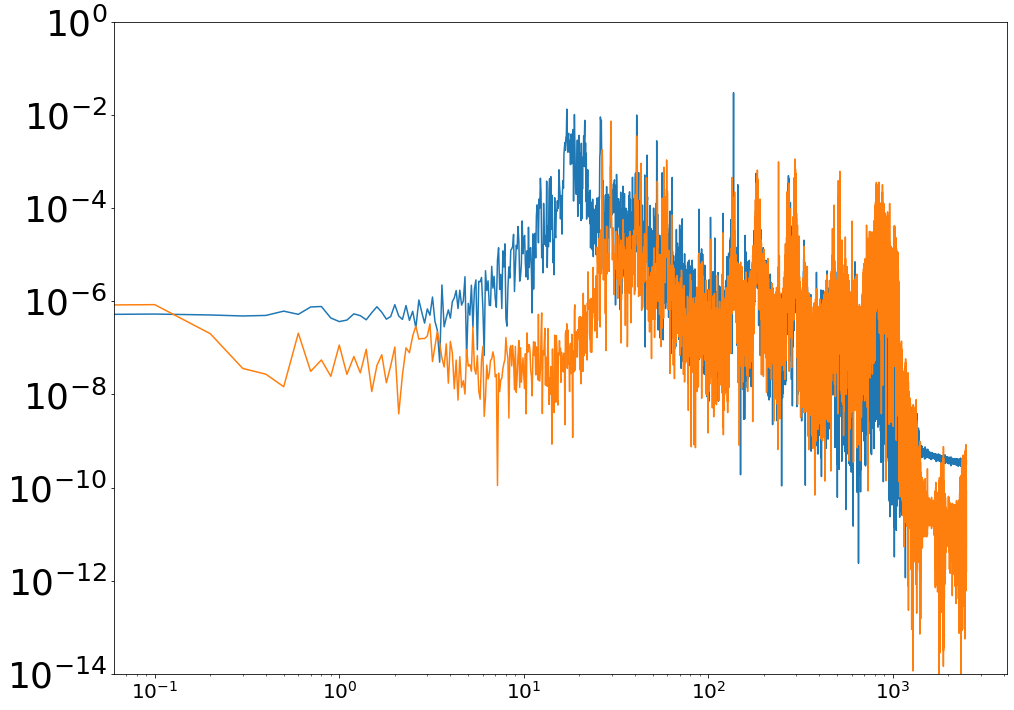

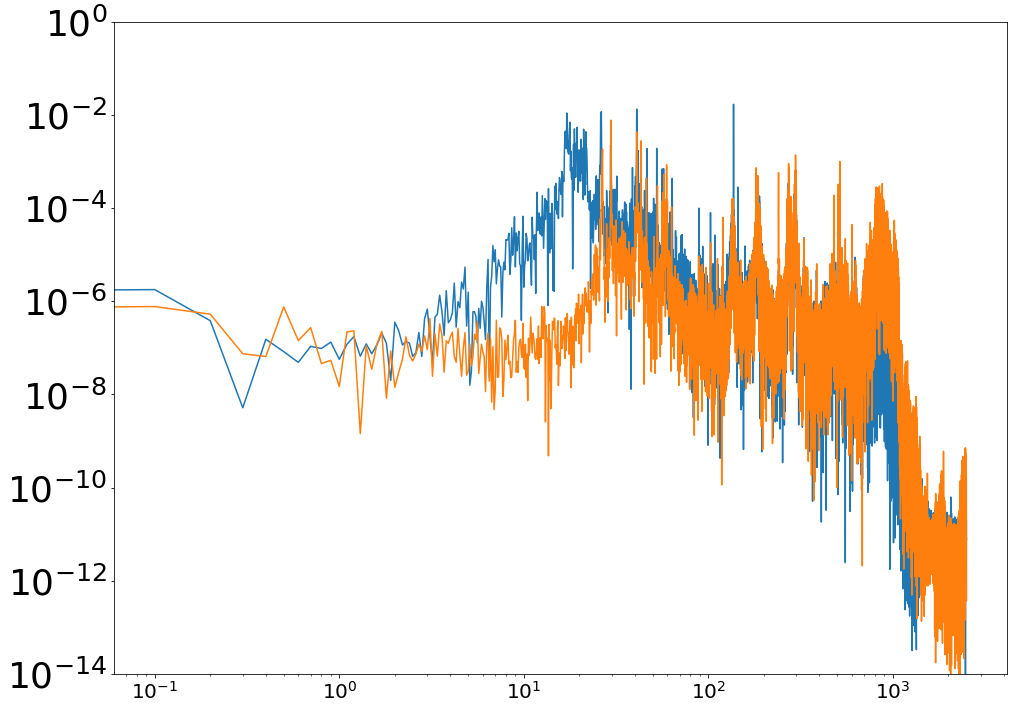

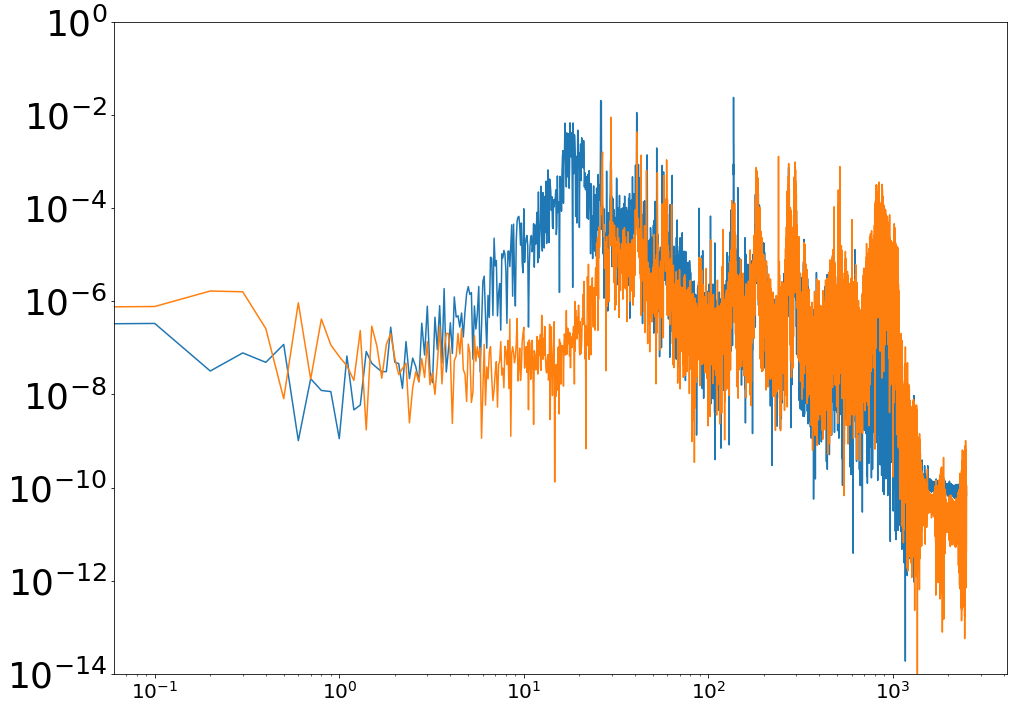

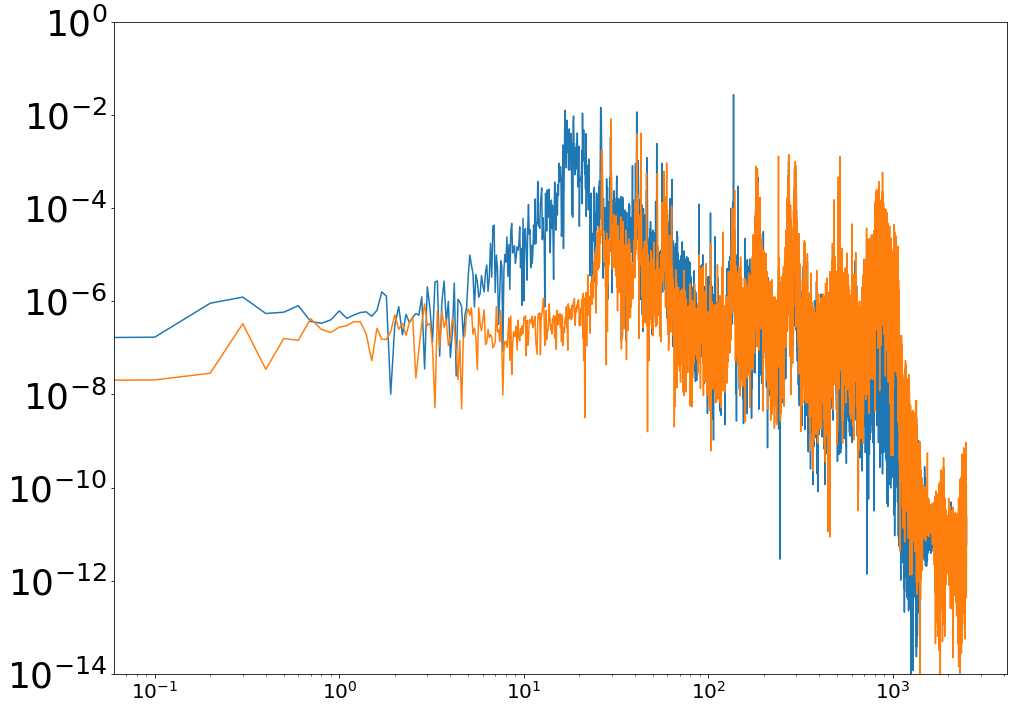

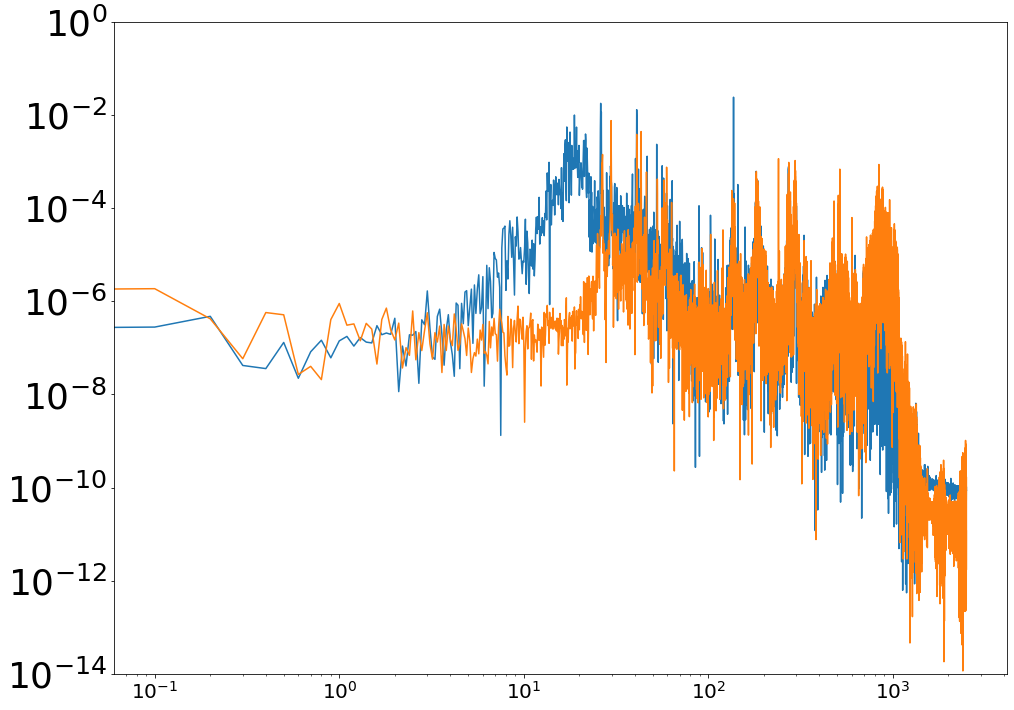

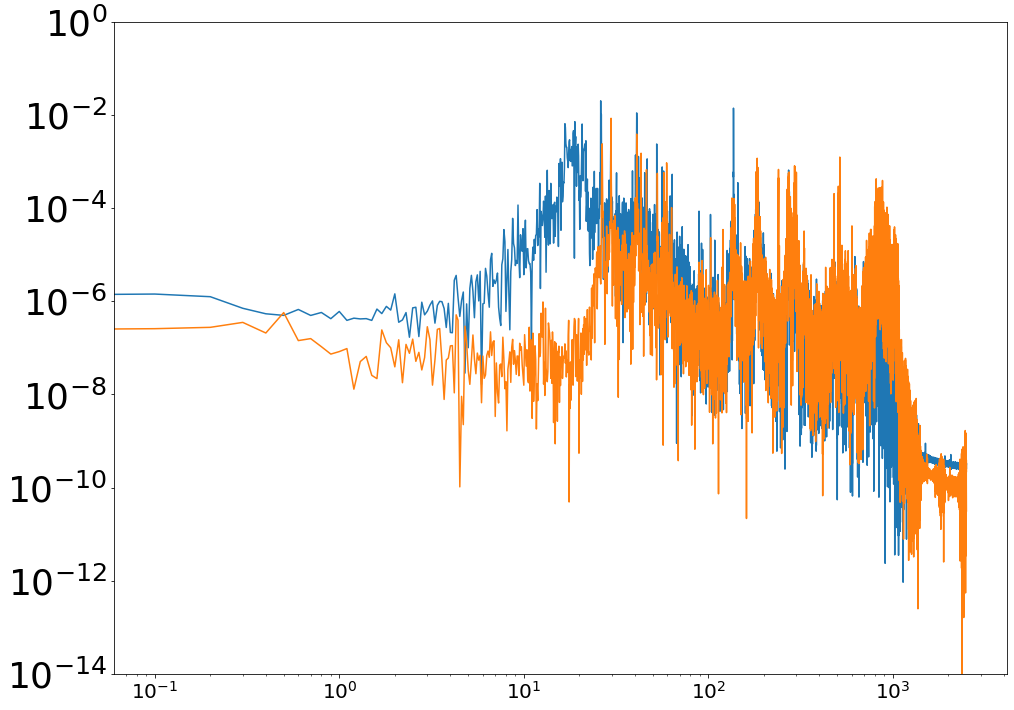

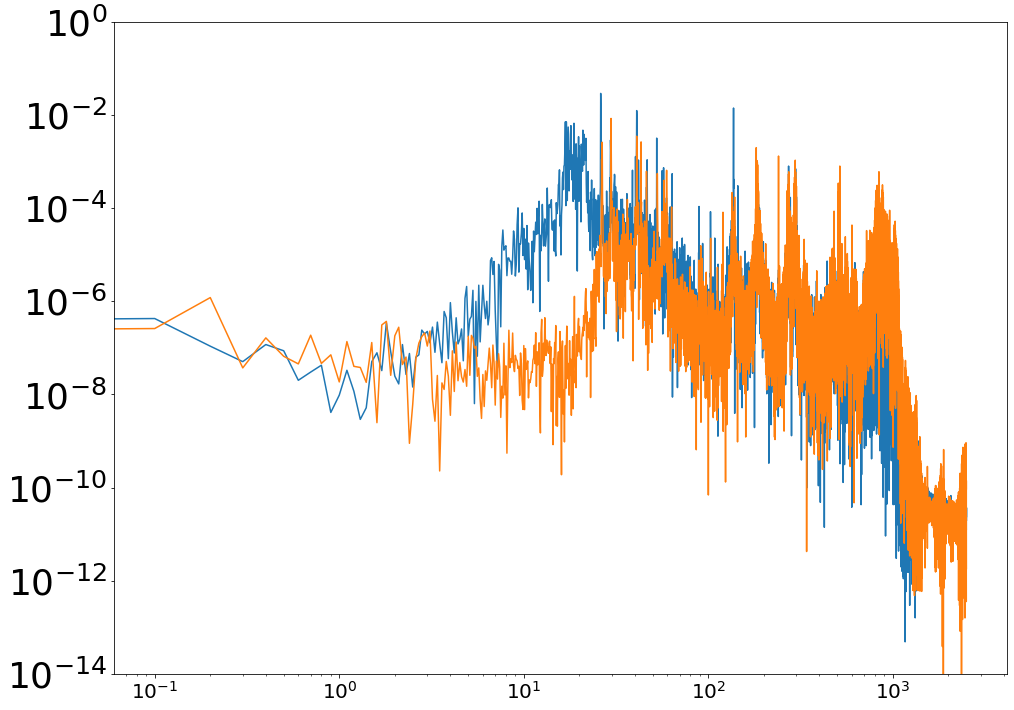

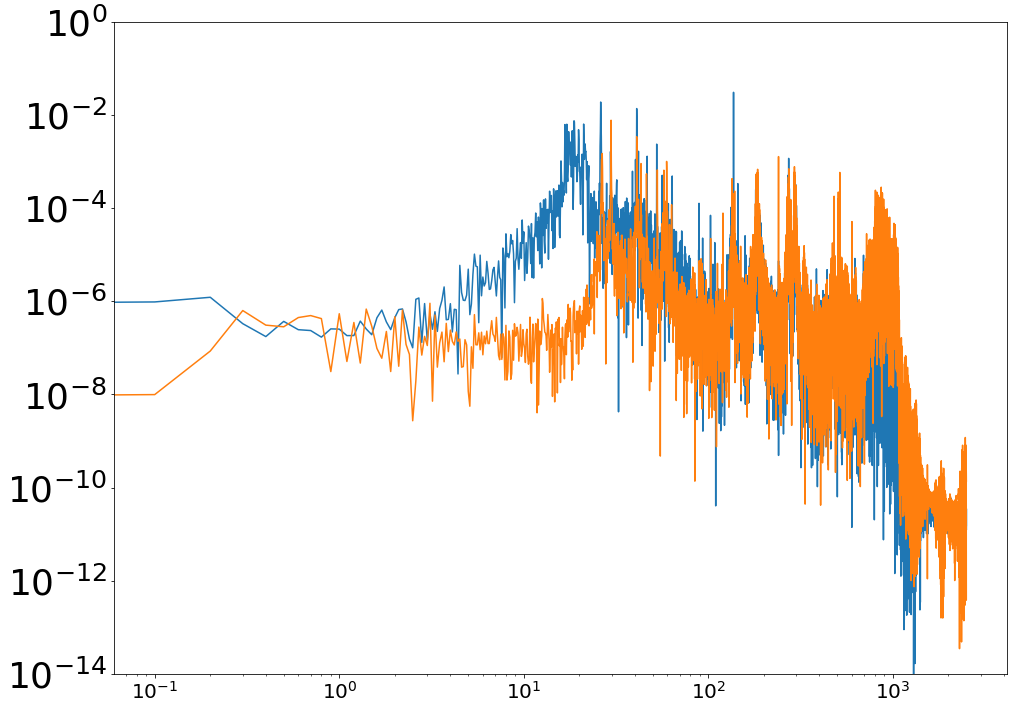

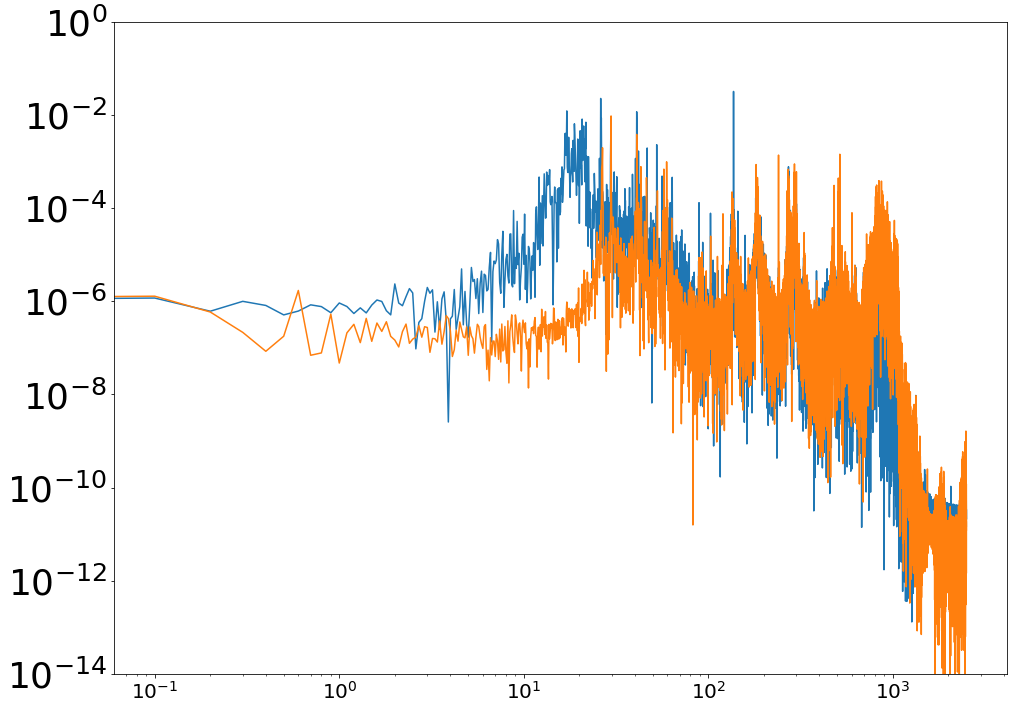

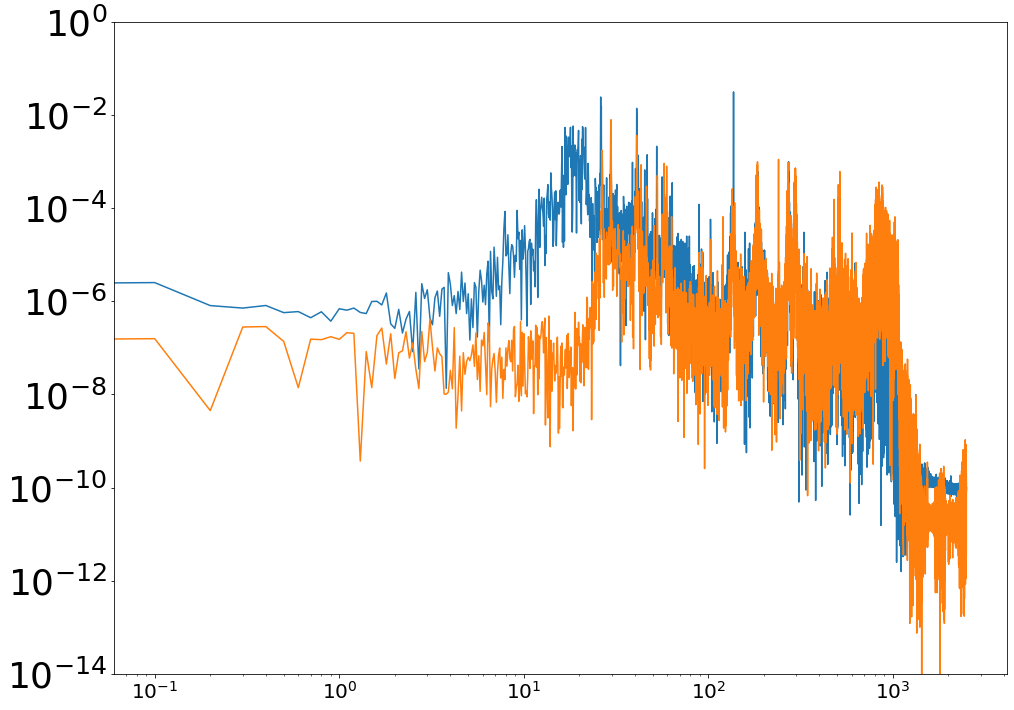

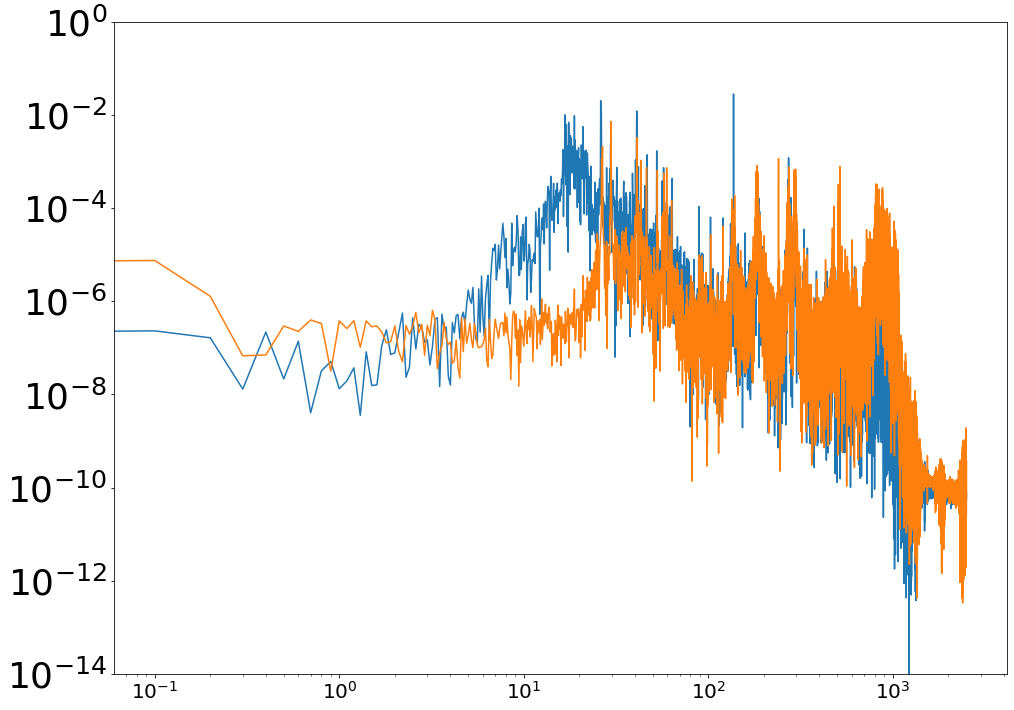

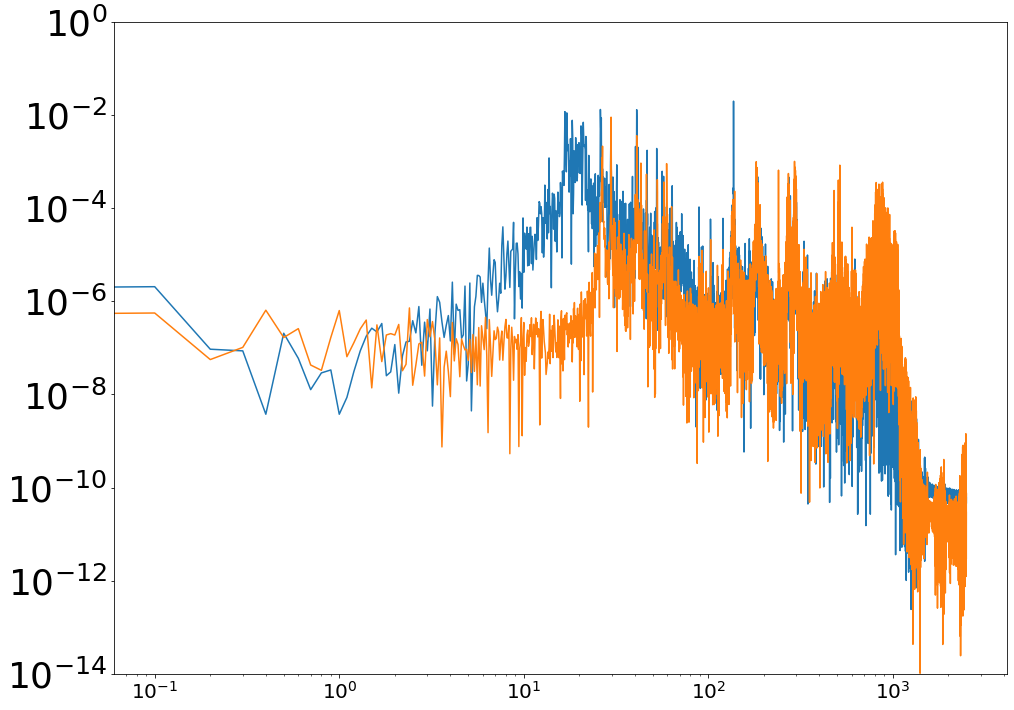

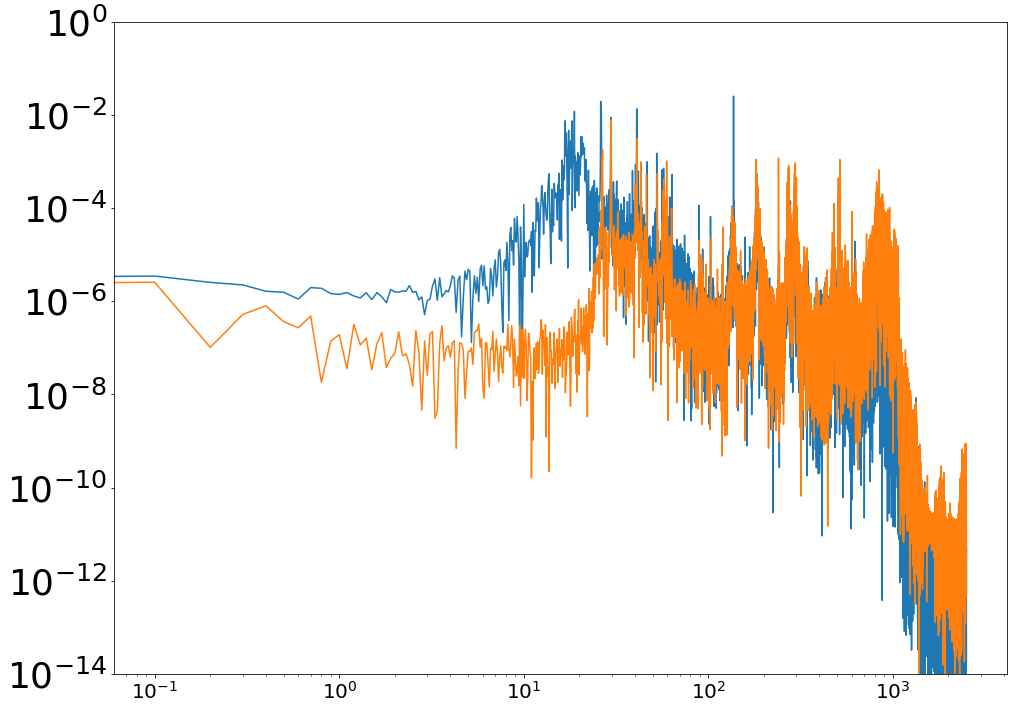

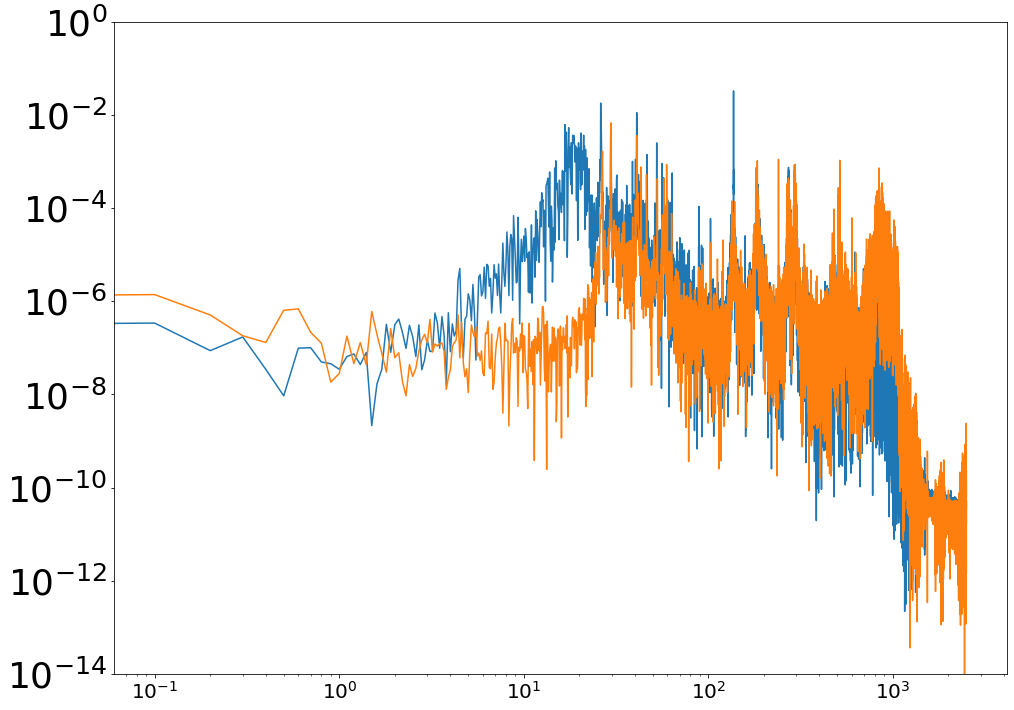

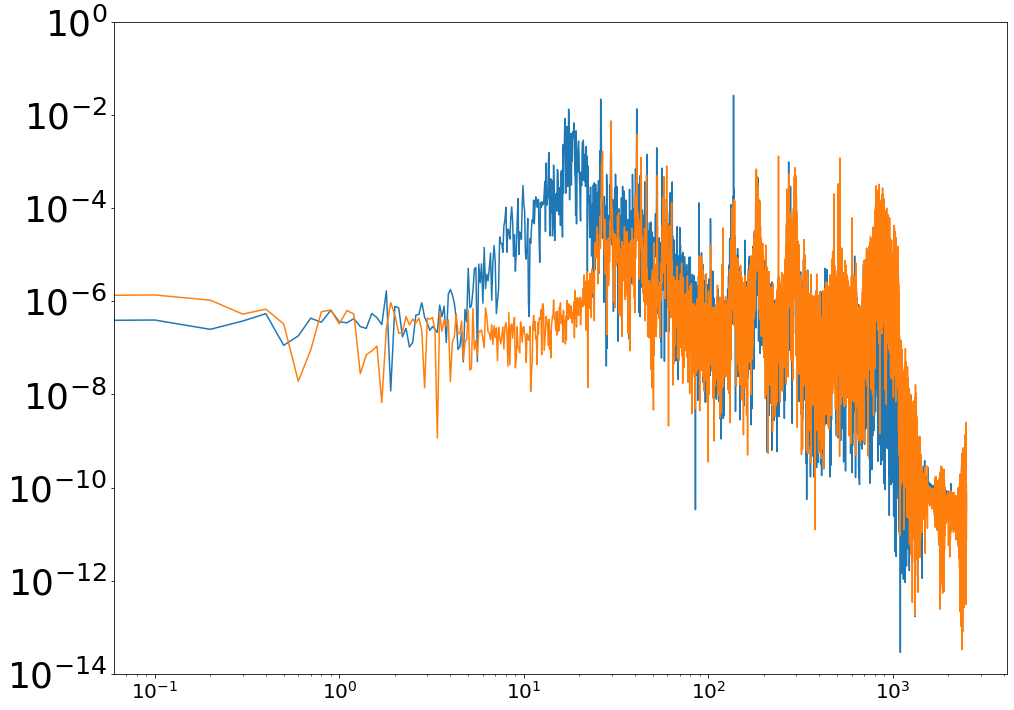

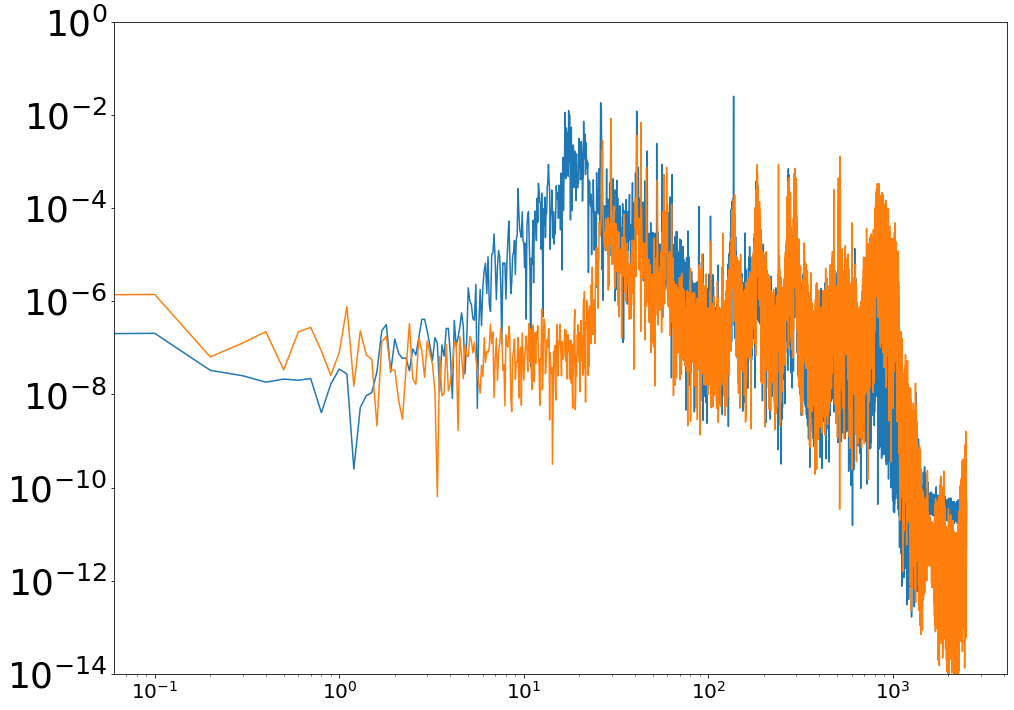

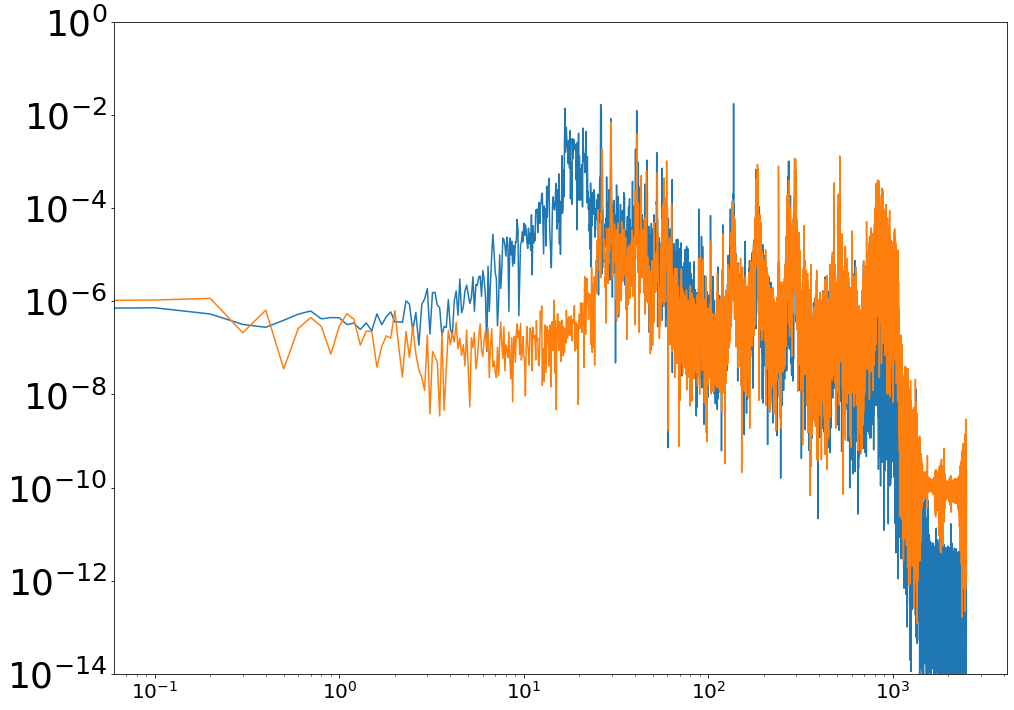

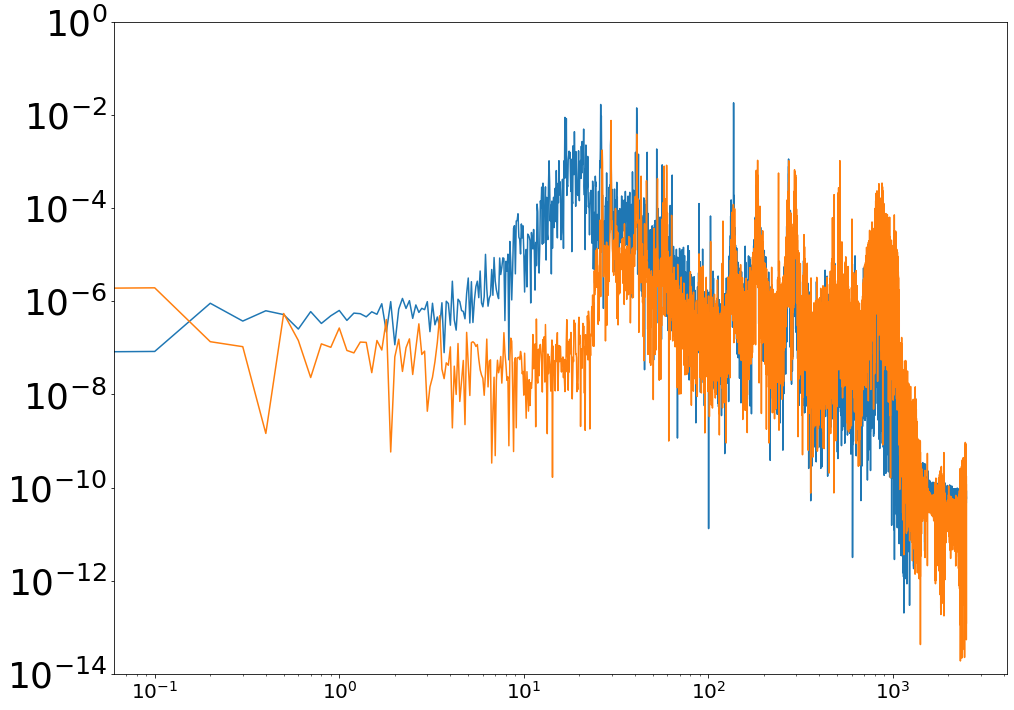

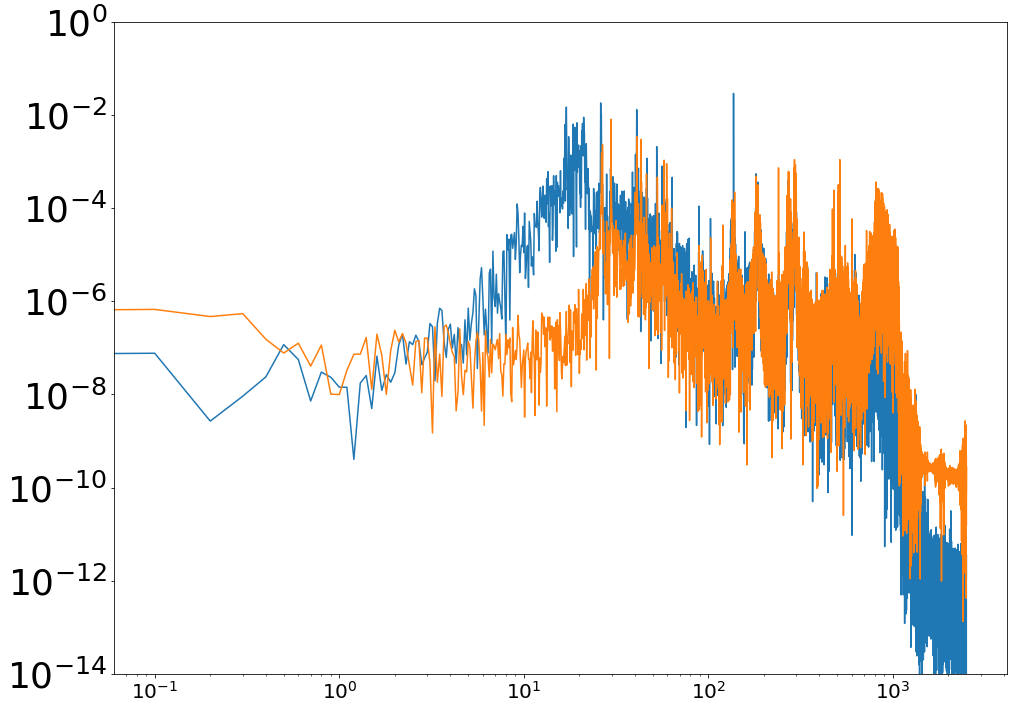

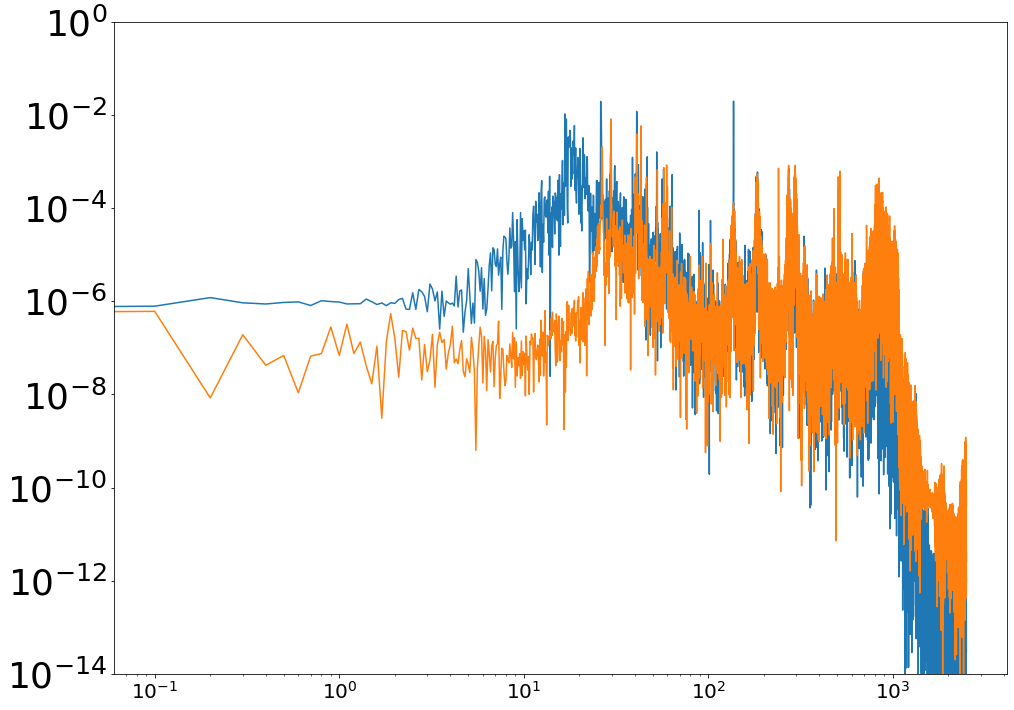

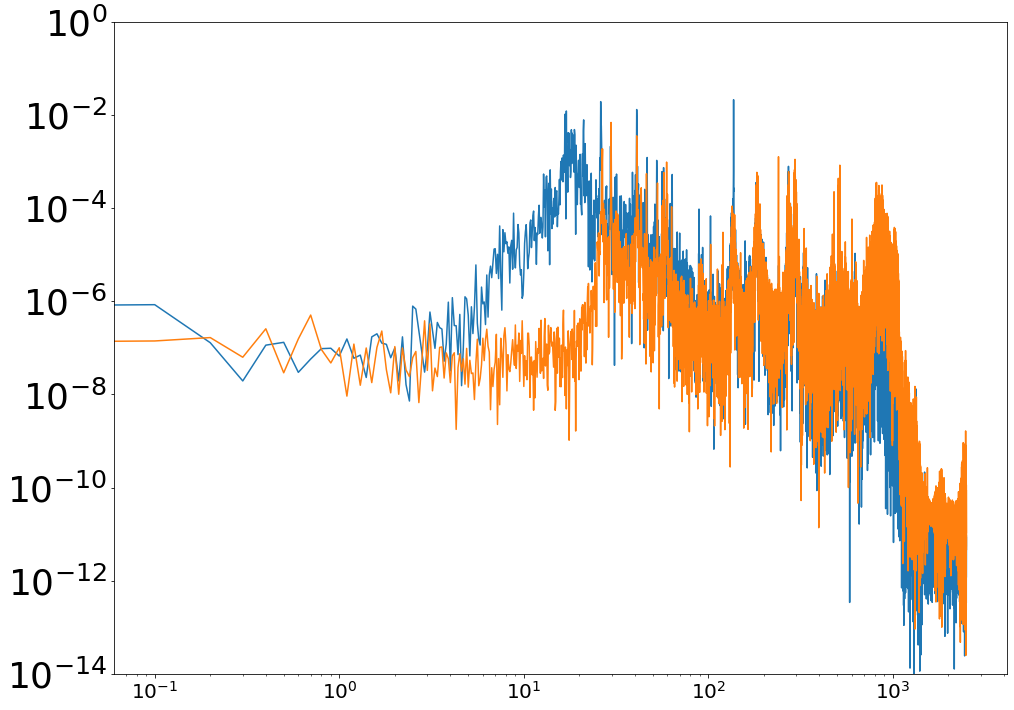

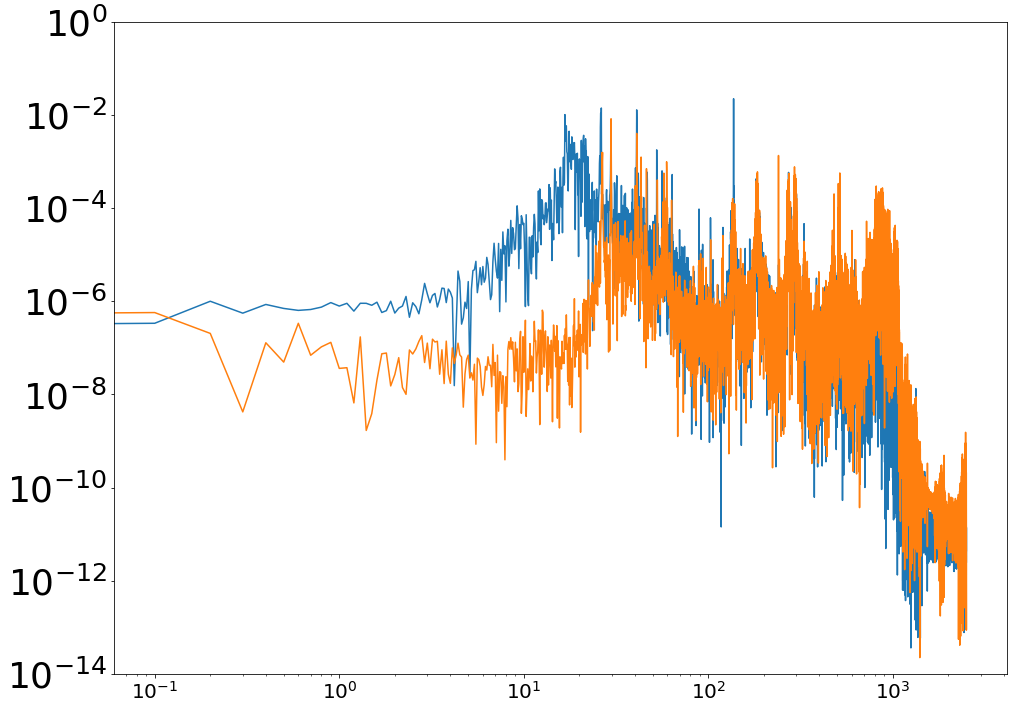

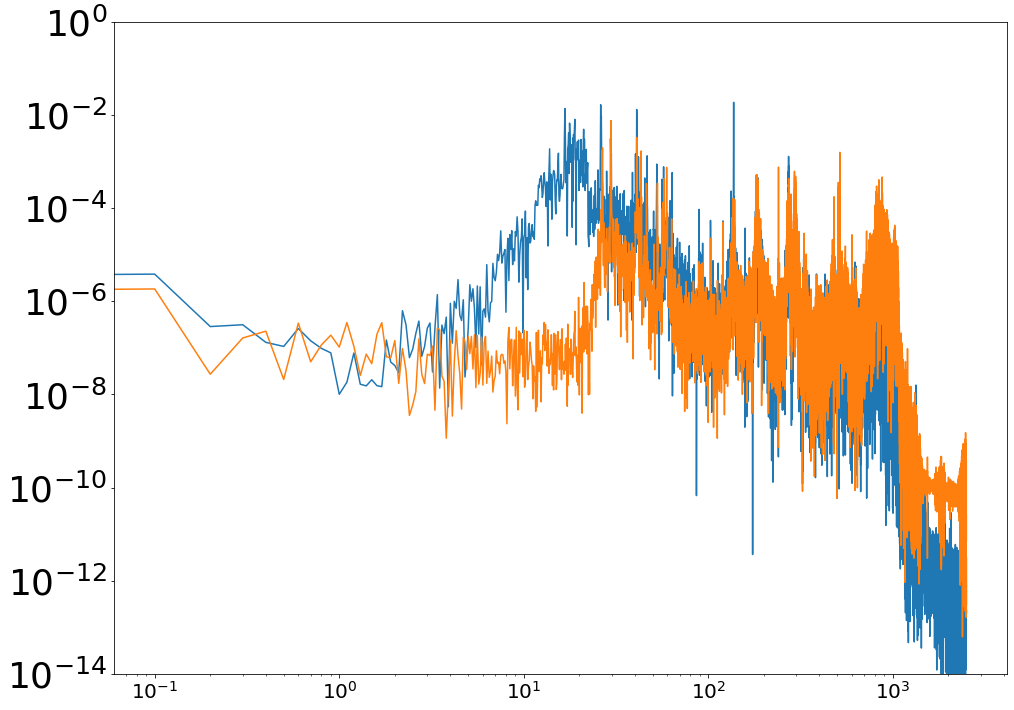

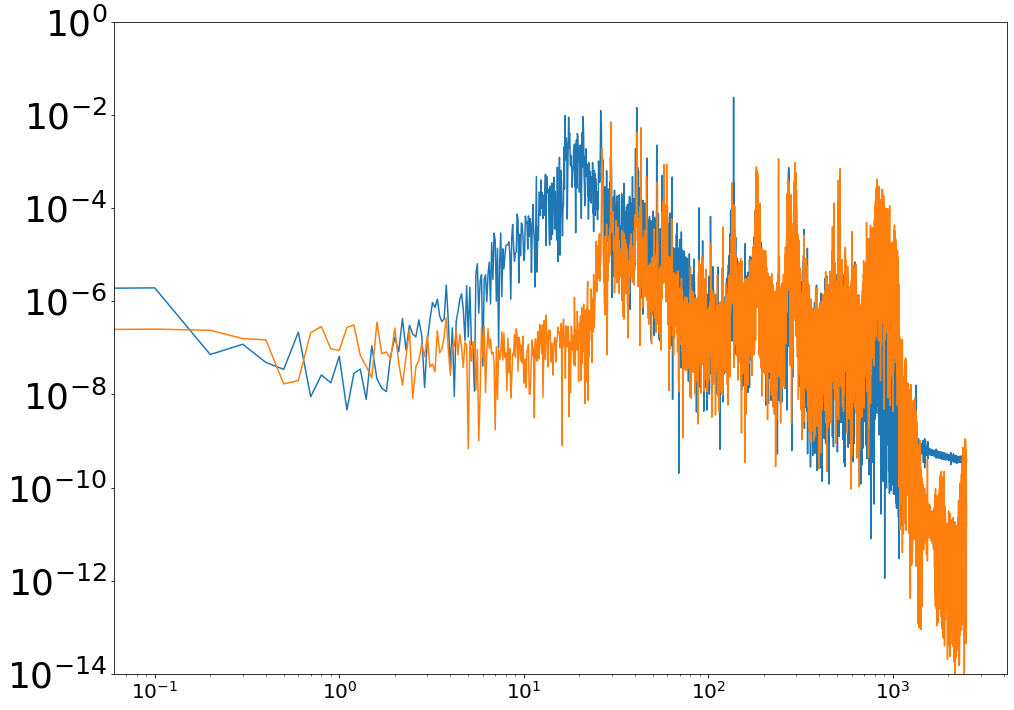

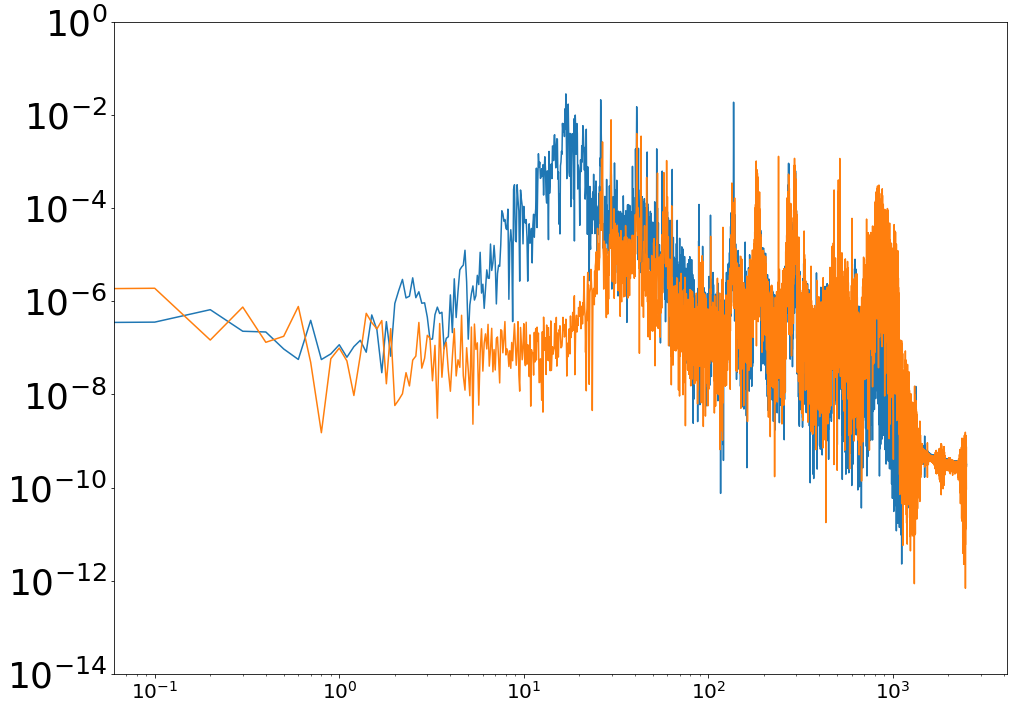

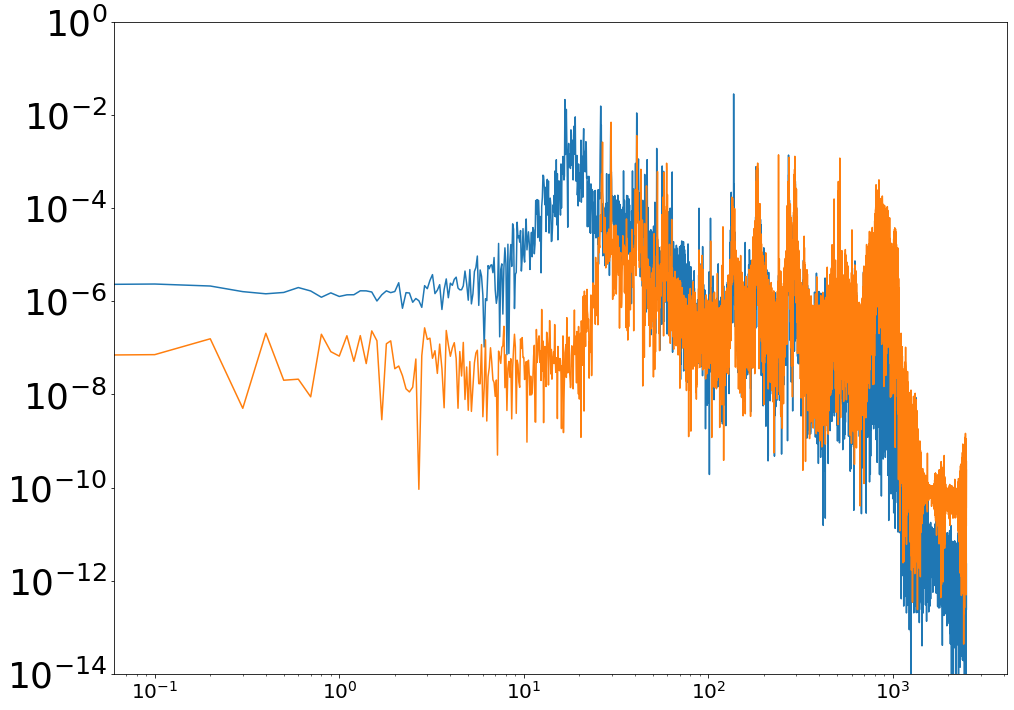

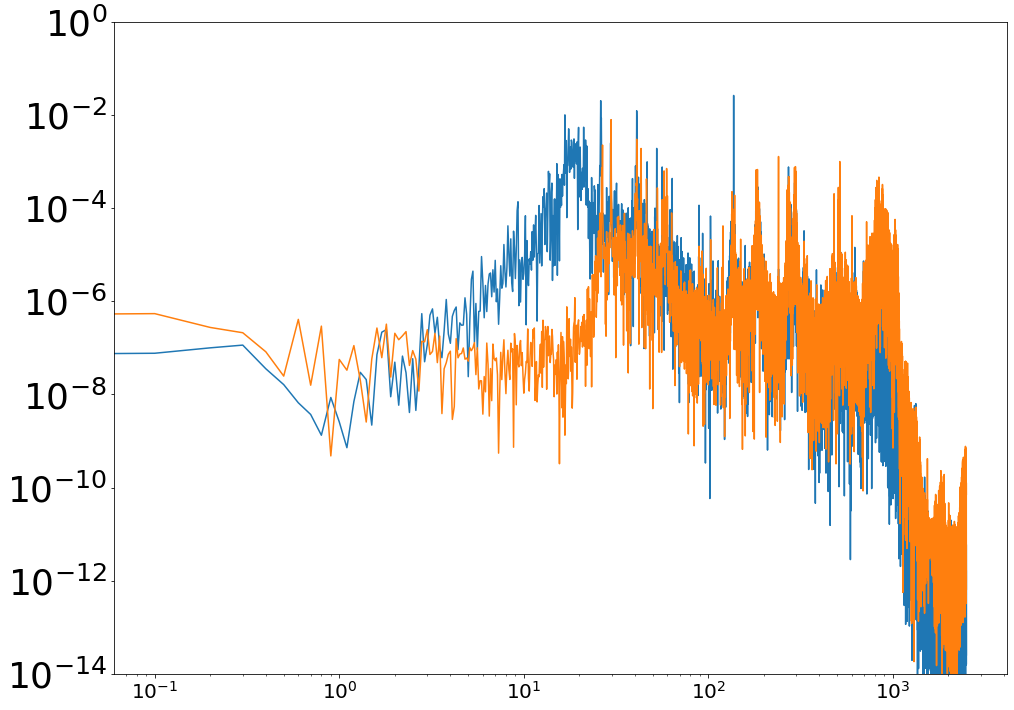

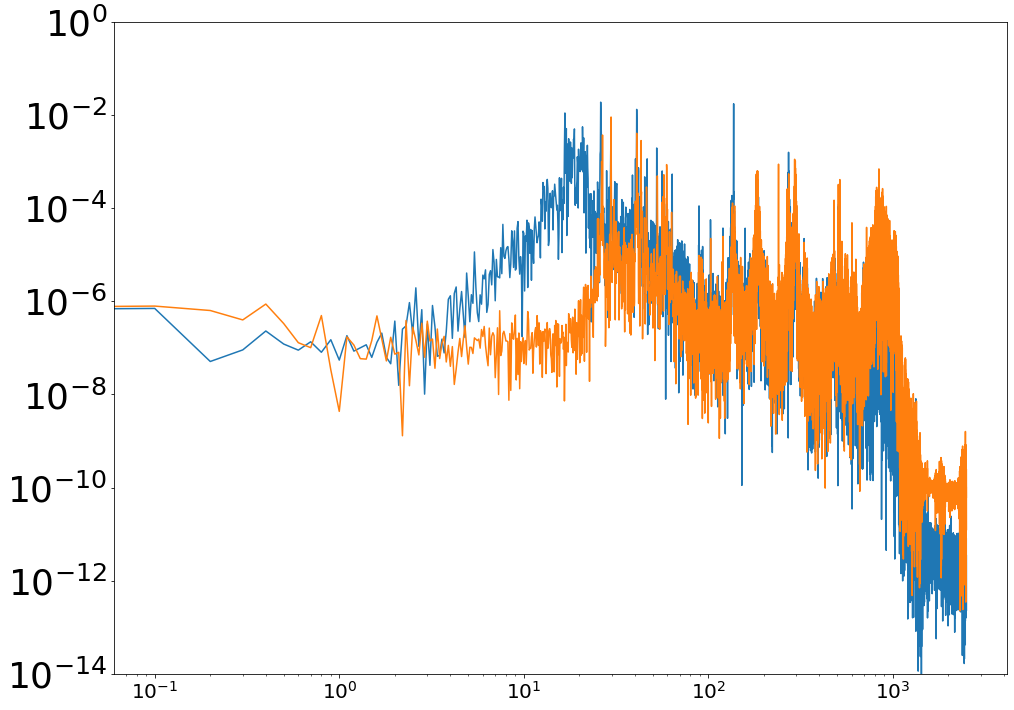

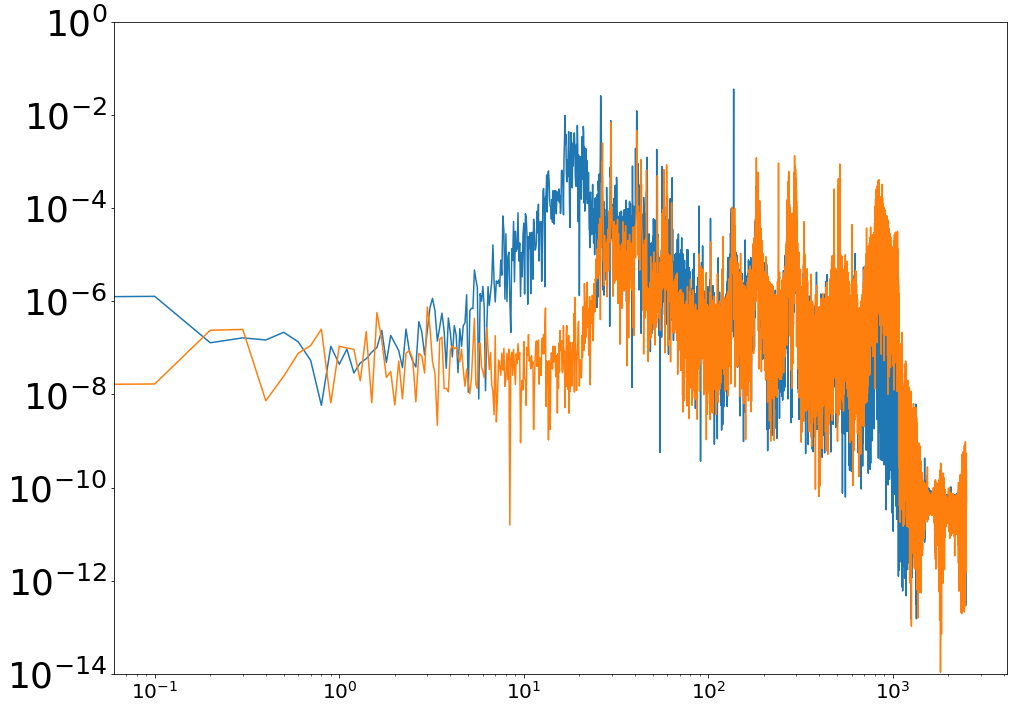

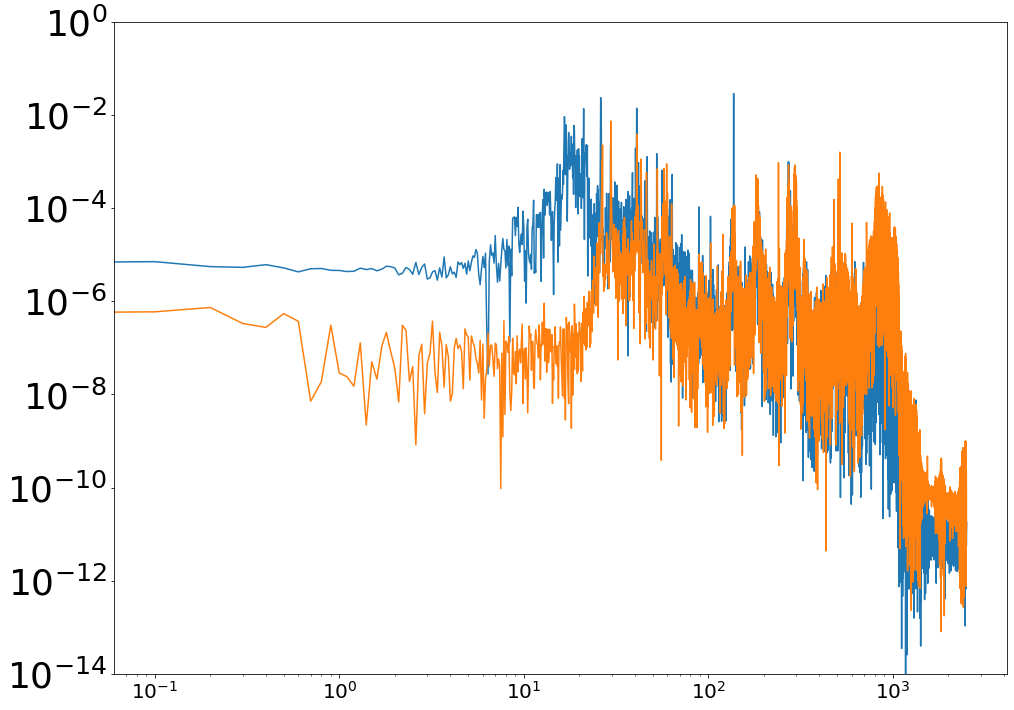

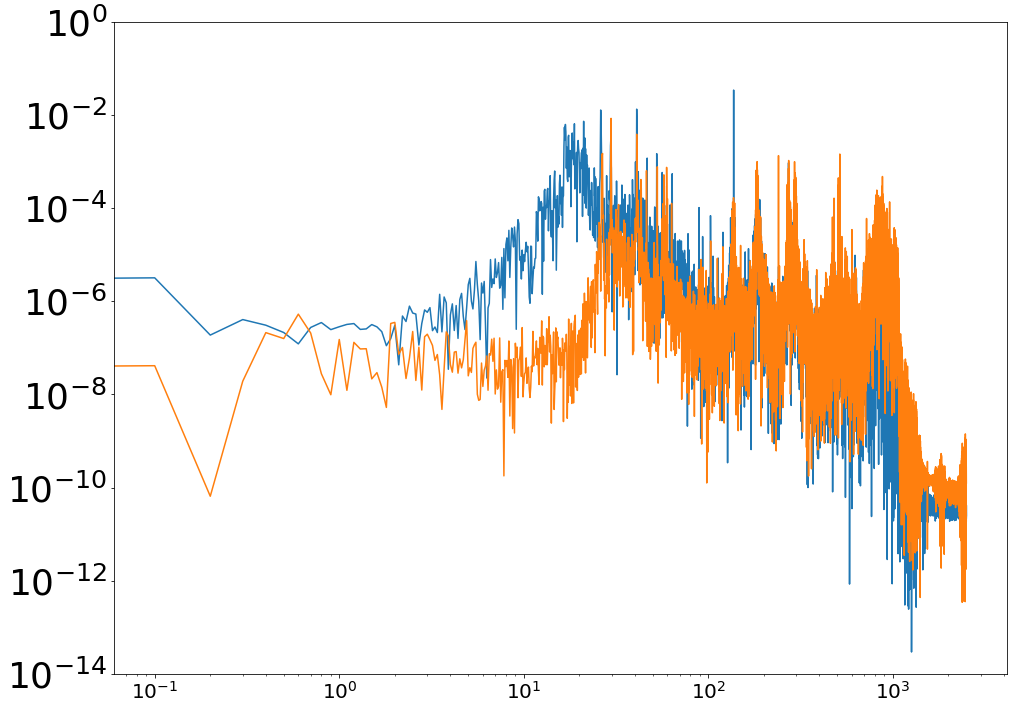

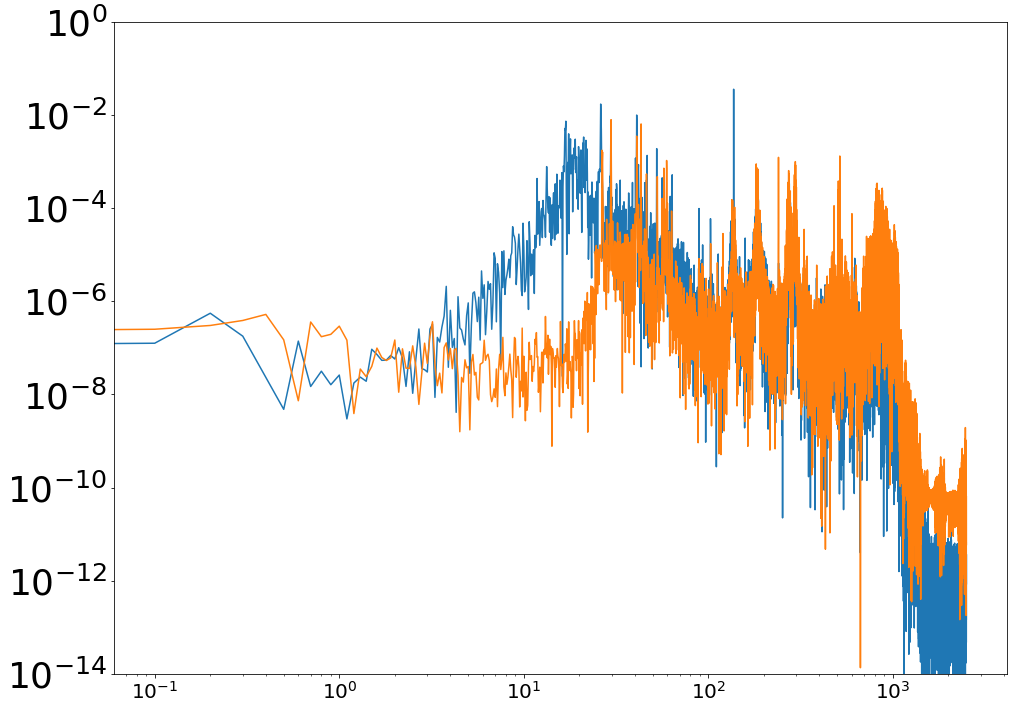

In [42]:
for i in range(50):
    data1=data_to_amp_and_phase_single_axis(l[i+50].seismometer,5000,50000)
    data2=data_to_amp_and_phase_single_axis(l2[i].seismometer,5000,50000)

    plt.plot(data1[0],data1[1])
    plt.plot(data2[0],data2[1])
    plt.yscale("log")
    plt.xscale("log")
    plt.ylim(1e-14,1)
    plt.show()

In [152]:
# settings to the ASM003 from Gautam - settings are the same as for me
fExc = 13.1415
excAmp = 2*50e-3/2 * 15 #mV, the factor of 15 gets us to the actual voltage applied to the ASM003 piezos.
# Calibration numbers from elog 337
xCal, yCal = 7.83e-6, 5.54e-6 # urad/V
excAmpX, excAmpY = xCal*excAmp*1.27000000e-02, yCal*excAmp*1.27000000e-02 # m, last factor is to convert to motion at trap focus

In [155]:
dates=[20220629] #20220526,20220527,20220613,20220607,20220620,
for date in dates:
    folderName="/data/new_trap/%d/ASMcal/2/Xexc/" %date
    filePrefix="ASMcal"
    files = load_dir(folderName,file_prefix=filePrefix)
    #plt.plot(files[0].x2/np.mean(files[0].x2))
    calibrationFactorX = np.mean([np.abs(digital_demod(files[i].x2,13.1415))/excAmpX for i in range(10)])
    print(np.mean(files[0].quad_sum))
    print(calibrationFactorX)


100%|██████████| 10/10 [00:00<00:00, 191.77it/s]

10  files in folder
10  files loaded
-1128975701.59034
286523.94019857974


In [157]:
dates=[20220629] #20220526,20220527,20220613,20220607,20220620,
for date in dates:
    folderName="/data/new_trap/%d/ASMcal/2/Yexc/" %date
    filePrefix="ASMcal"
    files = load_dir(folderName,file_prefix=filePrefix)
    #plt.plot(files[0].x2/np.mean(files[0].x2))
    calibrationFactorY = np.mean([np.abs(digital_demod(files[i].y2,13.1415))/excAmpY for i in range(10)])
    print(np.mean(files[0].quad_sum))
    print(calibrationFactorY)


100%|██████████| 10/10 [00:00<00:00, 200.00it/s]

10  files in folder
10  files loaded
-1124541694.31568
192921.43963139376



100%|██████████| 10/10 [00:00<00:00, 226.40it/s]

10  files in folder
10  files loaded
11888852575011.271
10  files in folder
10  files loaded
14015045785086.31
10  files in folder
10  files loaded
1485669239242.181


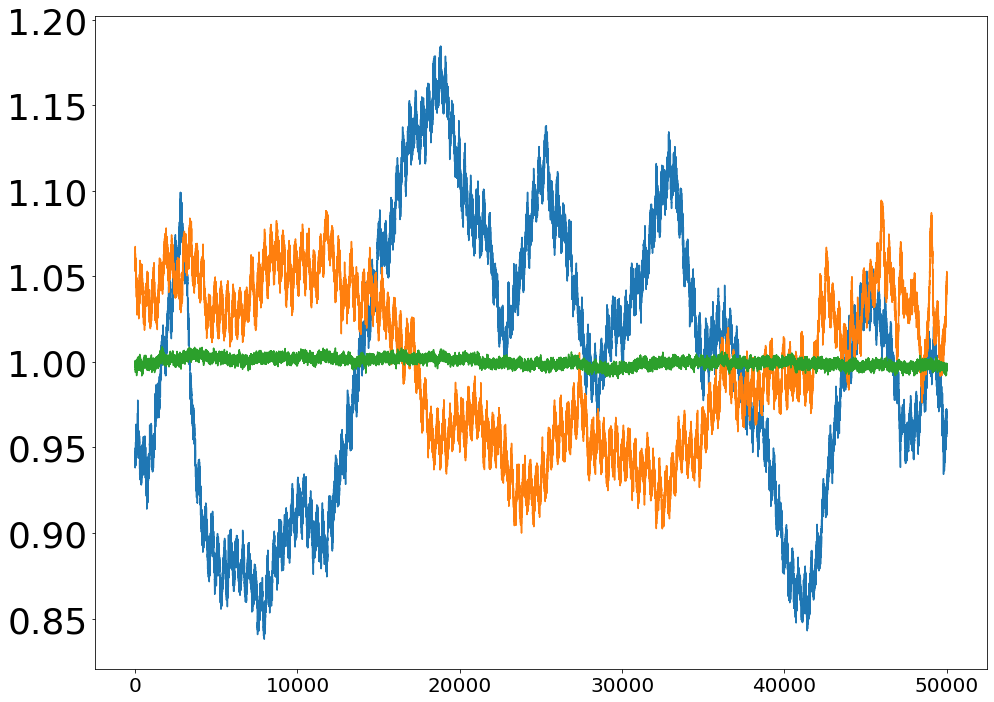

In [50]:
dates=[20220607,20220620,20220629] #20220526,20220527,20220607,20220613,
for date in dates:
    folderName="/data/new_trap/%d/ASMcal/Xexc/" %date
    filePrefix="ASMcal"
    files = load_dir(folderName,file_prefix=filePrefix)
    plt.plot(files[0].y2/np.mean(files[0].y2))
    calibrationFactorX = np.mean([np.abs(digital_demod(files[i].xyz[1],13.1415))/excAmpY for i in range(10)])
    print(calibrationFactorX)


  0%|          | 0/10 [00:00<?, ?it/s]

10  files in folder
10  files loaded
88568628732230.16



  0%|          | 0/10 [00:00<?, ?it/s]

10  files in folder
10  files loaded
85461637127519.33



100%|██████████| 10/10 [00:00<00:00, 11.51it/s]

10  files in folder
10  files loaded
60689107059820.55


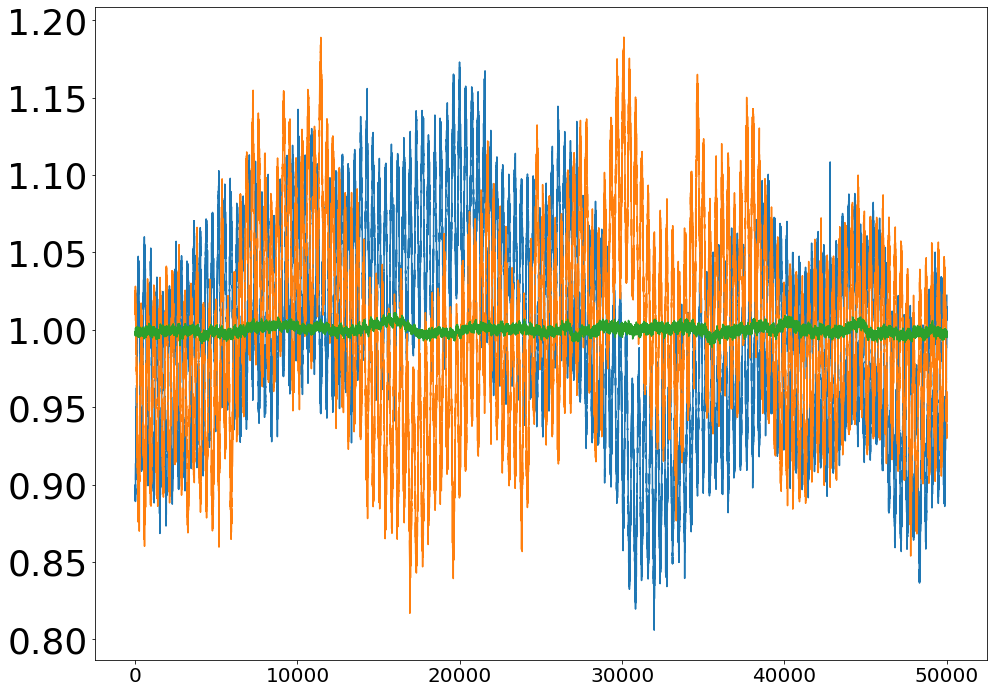

In [51]:
dates=[20220607,20220620,20220629] # 20220526,20220527,20220607,20220613,
for date in dates: 
    #folderName="/data/new_trap/%d/ASMcal/Yexc/" %date
    folderName="/home/data_transfer/data_from_windows/%d/ASMcal/Yexc/" %date

    filePrefix="ASMcal"
    files = load_dir(folderName,file_prefix=filePrefix)
    plt.plot(files[0].y2/np.mean(files[0].y2))
    calibrationFactorY= np.mean([np.abs(digital_demod(files[i].xyz[1],13.1415))/excAmpY for i in range(10)])
    print(calibrationFactorY)


  0%|          | 0/10 [00:00<?, ?it/s]

10  files in folder
10  files loaded
62665415475932.95



  0%|          | 0/10 [00:00<?, ?it/s]

10  files in folder
10  files loaded
60467109793928.11



100%|██████████| 10/10 [00:00<00:00, 12.74it/s]

10  files in folder
10  files loaded
42939674726871.75


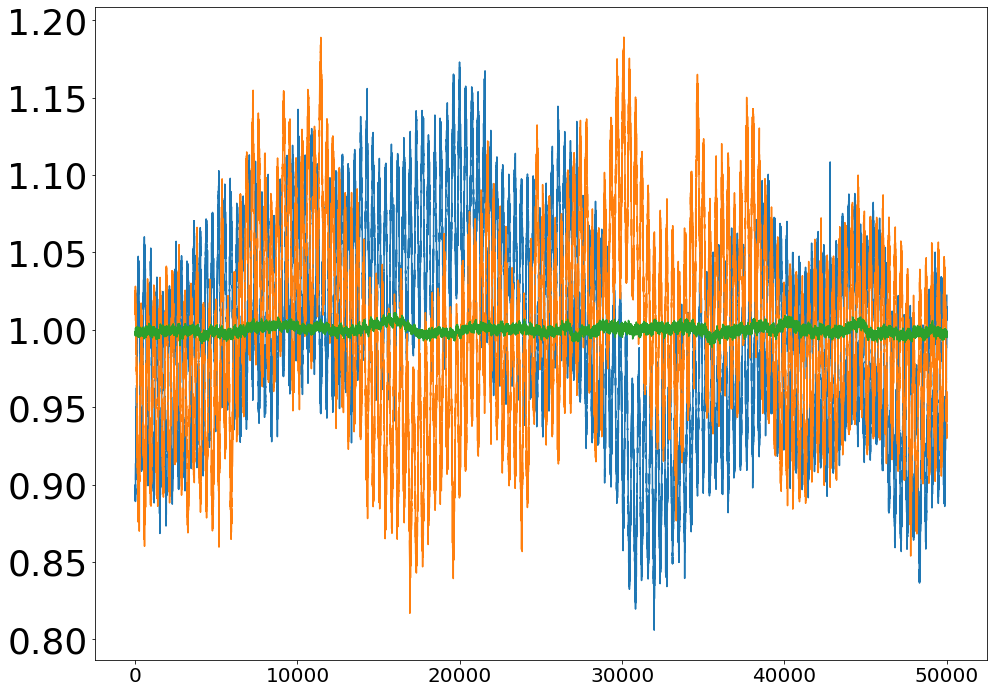

In [52]:
dates=[20220607,20220620,20220629] # 20220526,20220527,20220607,20220613,
for date in dates: 
    #folderName="/data/new_trap/%d/ASMcal/Yexc/" %date
    folderName="/home/data_transfer/data_from_windows/%d/ASMcal/Yexc/" %date

    filePrefix="ASMcal"
    files = load_dir(folderName,file_prefix=filePrefix)
    plt.plot(files[0].y2/np.mean(files[0].y2))
    calibrationFactorY= np.mean([np.abs(digital_demod(files[i].xyz[1],13.1415))/excAmpX for i in range(10)])
    print(calibrationFactorY)

In [107]:
fname="/data/new_trap/20220629/ASMcal/Xexc/ASMcal_3.h5"
f = h5py.File(fname,'r')
pos_data = np.array(f['pos_data'])
quad_data = np.array(f['quad_data']) 

In [108]:
amp = quad_data.reshape(-1,12).T[:5]

0


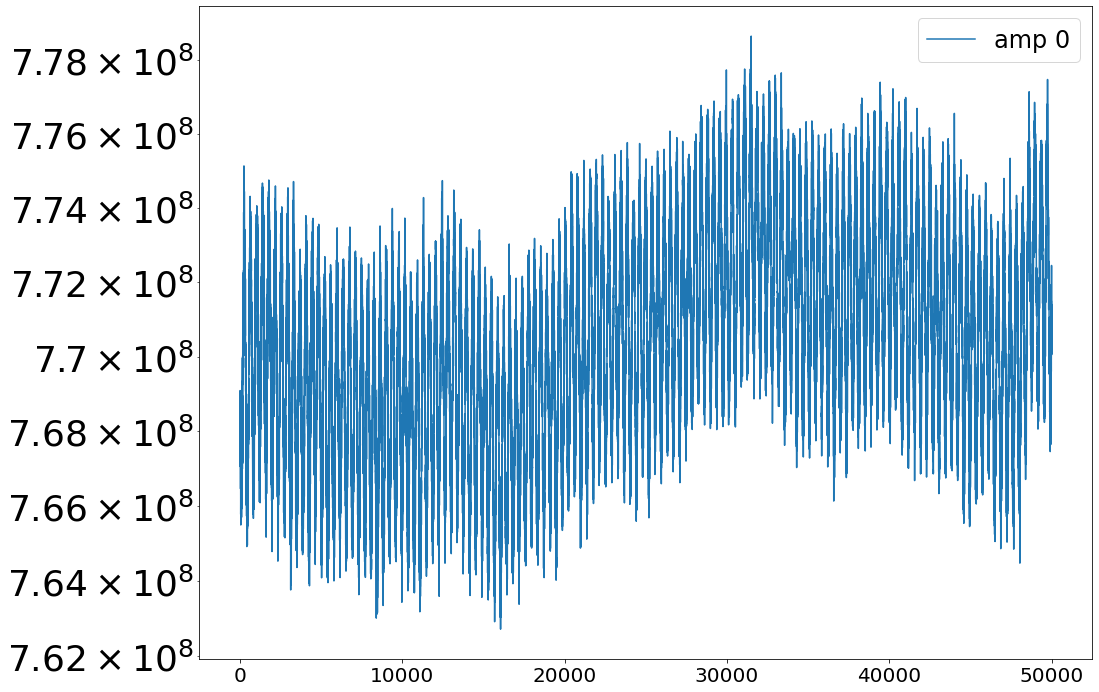

1


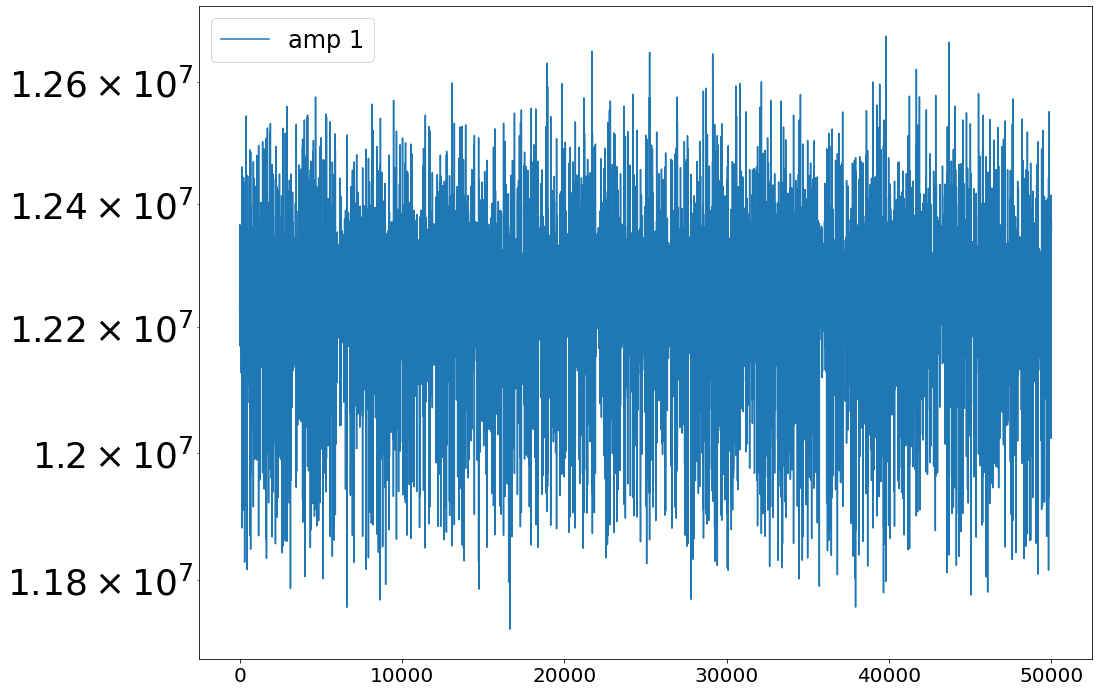

2


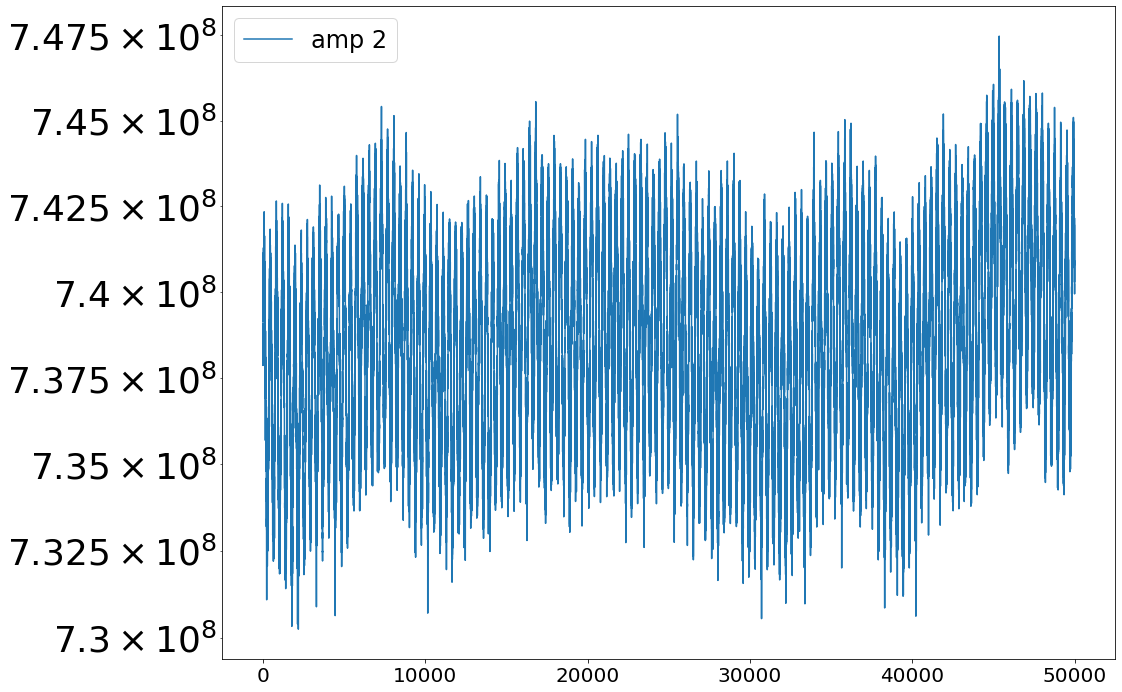

3


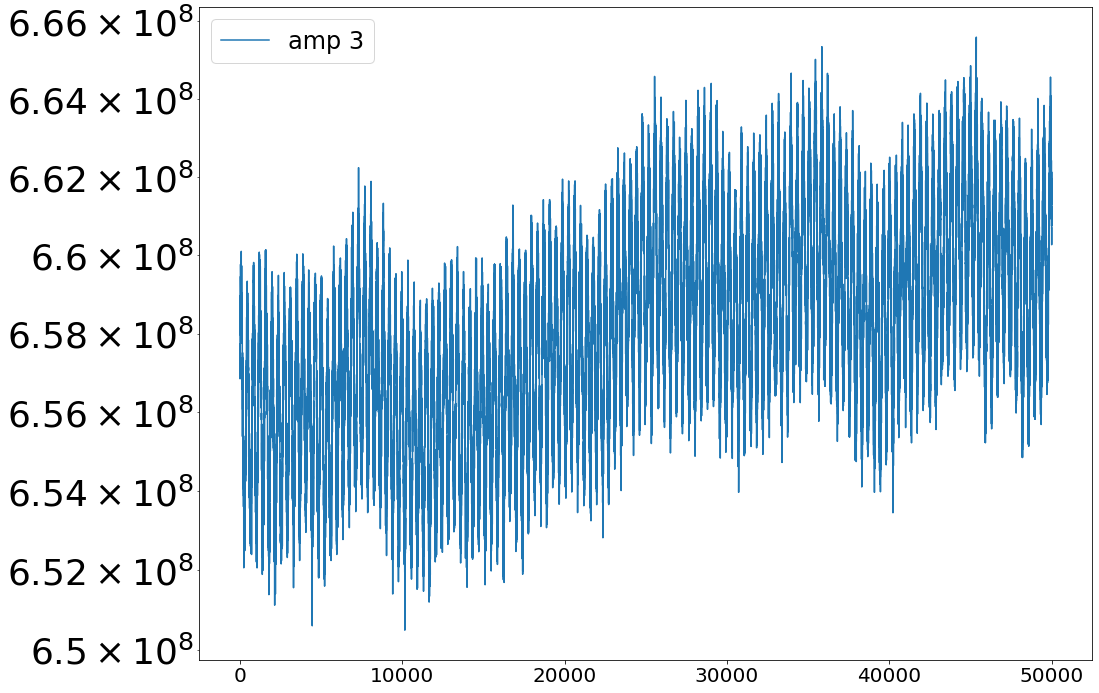

In [109]:
for i in range(4):
    print(i)
    plt.plot(amp[i],label="amp %d" %i)
    plt.yscale("log")
    plt.legend()
    plt.show()

In [42]:
fname="/data/new_trap/20220629/ASMcal/2/Yexc/ASMcal_3.h5"
f = h5py.File(fname,'r')
quad_data = np.array(f['quad_data']) 
amp = quad_data.reshape(-1,12).T[:5]

In [40]:
fname="/data/new_trap/20220607/ASMcal/Yexc/ASMcal_3.h5"
f2 = h5py.File(fname,'r')
quad_data2 = np.array(f2['quad_data']) 
amp = quad_data2.reshape(-1,12).T[:5]

In [24]:
fname="/data/new_trap/20200320/Bead1/Shaking/Shaking378/Shaking3_3.h5"
f2 = h5py.File(fname,'r')
quad_data2 = np.array(f2['quad_data']) 
amp = quad_data2.reshape(-1,12).T[:5]

In [33]:
right = amp[0] + amp[1]
left = amp[2] + amp[3]
top = amp[0] + amp[2]
bottom = amp[1] + amp[3]
quad_sum = right + left
x2 = (right - left)/quad_sum
y2 = (top - bottom)/quad_sum 

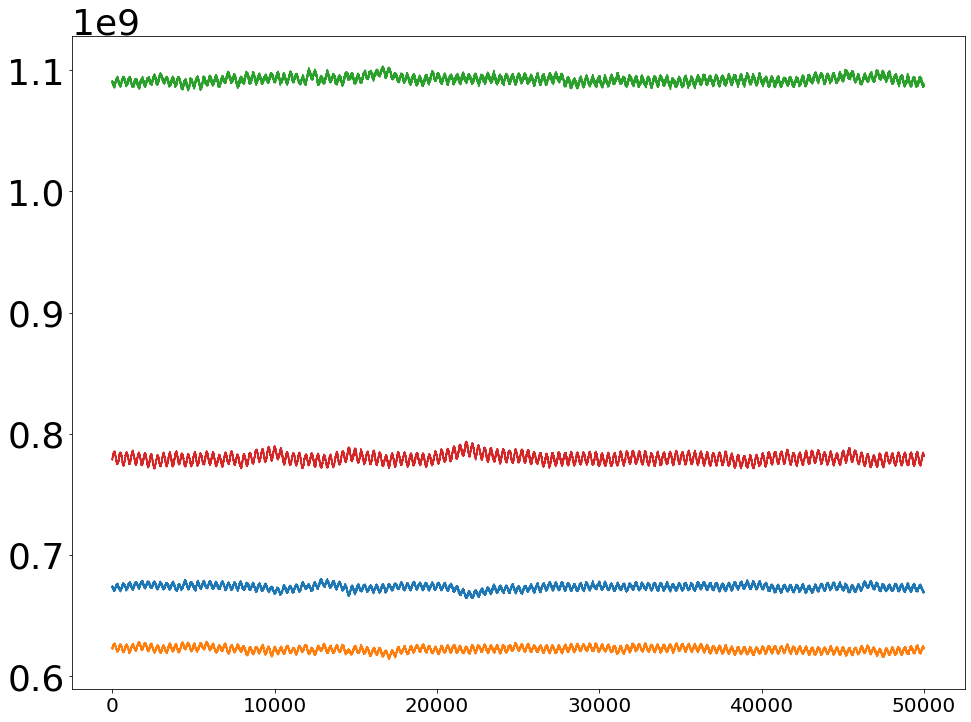

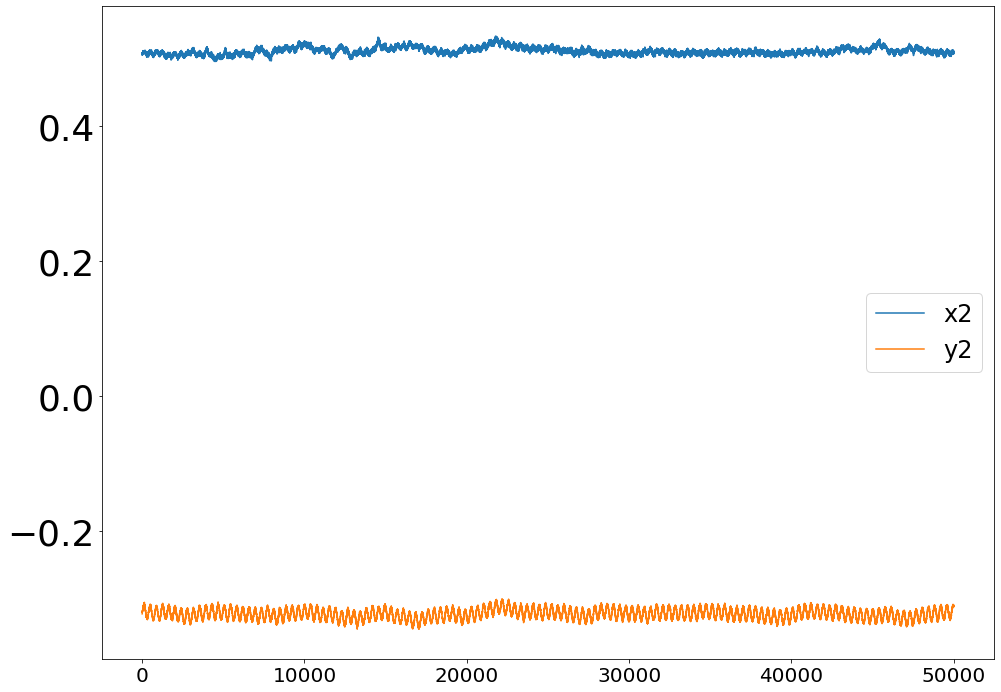

In [43]:
for i in range(4):
    plt.plot(amp[i],label="%d"%i)
    # plt.plot(amp2[i])
plt.show()    
    
plt.plot(x2,label="x2")
plt.plot(y2,label="y2")
plt.legend()


In [19]:
fname="/home/data_transfer/data_from_windows/Testdata/20220701/InitialTest_1.h5"
f = h5py.File(fname,'r')
pos_data = np.array(f['pos_data'])
quad_data = np.array(f['quad_data']) 
amp = quad_data.reshape(-1,12).T[:5]

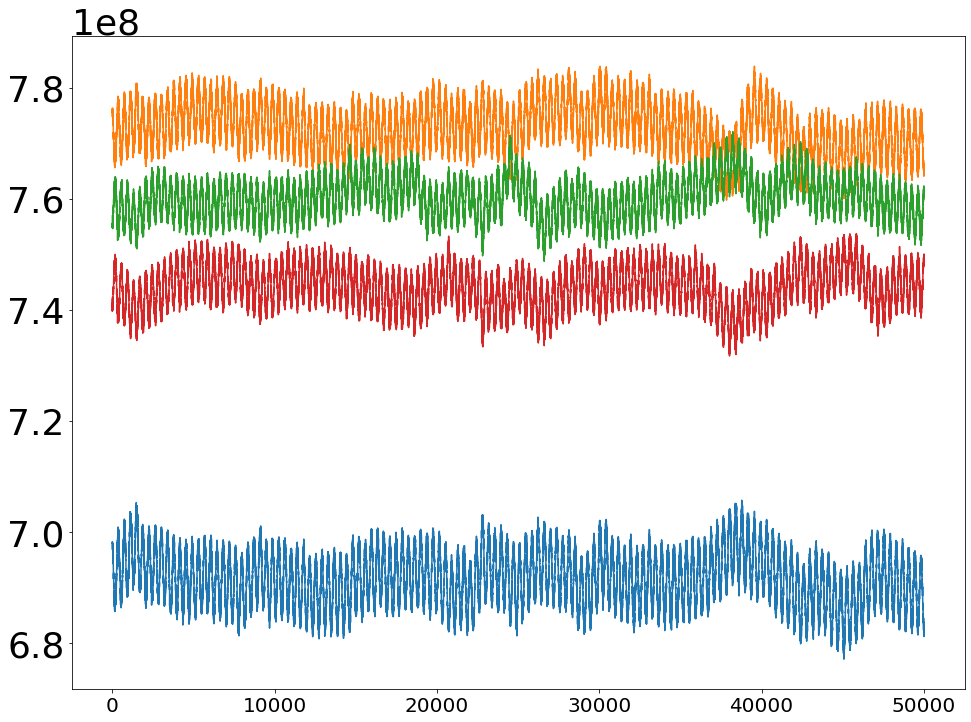

NameError: name 'x2' is not defined

In [20]:
for i in range(4):
    plt.plot(amp[i],label="%d"%i)
    # plt.plot(amp2[i])
plt.show()    
    
plt.plot(x2,label="x2")
plt.plot(y2,label="y2")
plt.legend()
